## Practical Work 4

We will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
from sklearn.metrics import r2_score

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [4]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

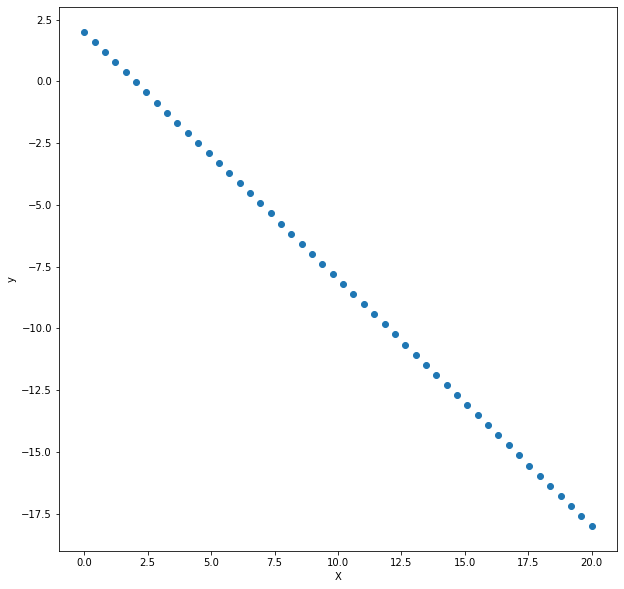

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [6]:
def plot_loss_epochs(losses, epochs, f_size):
  plt.figure(figsize=f_size)
  plt.plot(losses, epochs, marker='*')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title("plot loss vs epochs")
  plt.show()

def plot_loss_theta(losses, thetas, alpha, i):
  plt.figure(figsize=(10, 10))
  plt.plot(thetas, losses, marker='*')
  plt.xlabel(f'Theta {i}')
  plt.ylabel('Loss')
  plt.title(f"Learning Rate = {alpha}")
  plt.show()

def plot_reg_lines(h_s, X, y):
  plt.figure(figsize=(10, 10))
  plt.scatter(X, y, marker='*')
  for i in range(len(h_s)):
    plt.plot(X, h_s[i], 'r')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.title(f"All regression lines")
  plt.show()

def plot_all(cost_vals, thetas0, thetas1, alpha, h_s, X, y, f_size):
  plot_loss_epochs(np.arange(len(cost_vals)), cost_vals, f_size)
  plot_loss_theta(cost_vals, thetas0, alpha, 0)
  plot_loss_theta(cost_vals, thetas1, alpha, 1)
  plot_reg_lines(h_s, X, y)
  plot_reg_lines([h_s[-1]], X, y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

In [7]:
def adagrad(X, y, alpha, epsilon, iterations):
  cost_vals = []
  h_s = []
  thetas0 = []
  thetas1 = []

  # 1. Initialize the parameters with zeros
  theta_0 = 0
  theta_1 = 0
  vt_0 = 0
  vt_1 = 0
  i = 0
  grad = np.ones((2, 1))
  m = y.shape[0]

  while i < iterations and np.linalg.norm(grad, 2) > 0.001:
      print(f"****************** Iteration {i} ****************** ")
      # 2. Predict the output
      h_x= theta_0 + theta_1 * X
      h_s.append(h_x)
      print(f"h(x): {h_x}")

      # 3. Calculate the cost function
      error = h_x - y
      j = (1 / (2 * m)) * np.linalg.norm(error, 2)**2
      print(f'Error Vector: \n{error}')
      print(f'\nj = {j}')
      cost_vals.append(j)
      
      # 4. Calculate the gradient
      d_theta_0 = np.sum(error) / m
      d_theta_1 = np.sum(error * X) / m
      grad[0] = d_theta_0
      grad[1] = d_theta_1
      print(f"Gradient Vector: \n{grad}")
      print(f"Gradient Vector Norm: {np.linalg.norm(grad, 2)}")

      # 5. Update the parameters
      vt_0 = vt_0 + d_theta_0**2
      vt_1 = vt_1 + d_theta_1**2
      theta_0 -= (alpha/(np.sqrt(vt_0) + epsilon)) * d_theta_0
      theta_1 -= (alpha/(np.sqrt(vt_1) + epsilon)) * d_theta_1
      print(f'theta_0_new : {theta_0}')
      print(f'theta_1_new : {theta_1}')
      thetas0.append(theta_0)
      thetas1.append(theta_1)

      # Convergence check
      if i > 1 and abs(cost_vals[-2] - cost_vals[-1]) < 0.001:
        break

      i += 1
    
  return theta_0, theta_1, cost_vals, h_s, thetas0, thetas1

##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [8]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = adagrad(X, y, alpha=0.05, epsilon=1e-08, iterations=500)

Streaming output truncated to the last 5000 lines.
  4.28336899  4.42689038]

j = 2.559418350772862
Gradient Vector: 
[[ 0.9106163 ]
 [21.30548124]]
Gradient Vector Norm: 21.32493265606795
theta_0_new : -0.6070282332688611
theta_1_new : -0.6504276376435174
****************** Iteration 95 ****************** 
h(x): [ -0.60702823  -0.8725089   -1.13798957  -1.40347024  -1.66895091
  -1.93443158  -2.19991224  -2.46539291  -2.73087358  -2.99635425
  -3.26183492  -3.52731559  -3.79279625  -4.05827692  -4.32375759
  -4.58923826  -4.85471893  -5.1201996   -5.38568026  -5.65116093
  -5.9166416   -6.18212227  -6.44760294  -6.71308361  -6.97856428
  -7.24404494  -7.50952561  -7.77500628  -8.04048695  -8.30596762
  -8.57144829  -8.83692895  -9.10240962  -9.36789029  -9.63337096
  -9.89885163 -10.1643323  -10.42981297 -10.69529363 -10.9607743
 -11.22625497 -11.49173564 -11.75721631 -12.02269698 -12.28817764
 -12.55365831 -12.81913898 -13.08461965 -13.35010032 -13.61558099]
Error Vector: 
[-2.607028

In [9]:
r2_score(y,h_s[-1])

0.9484638125790851

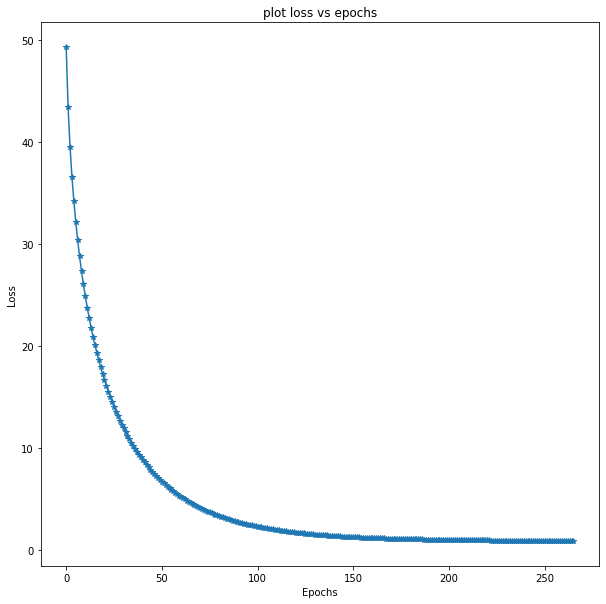

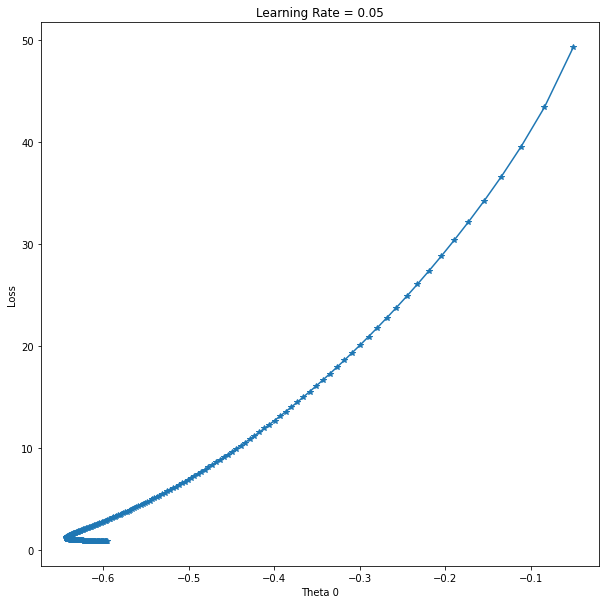

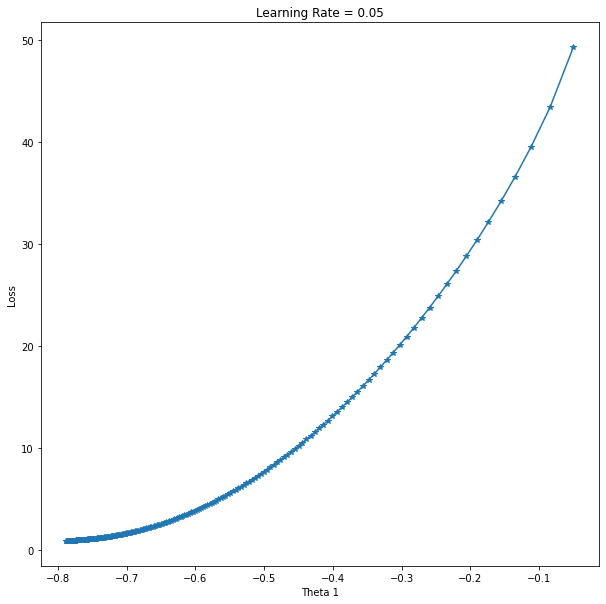

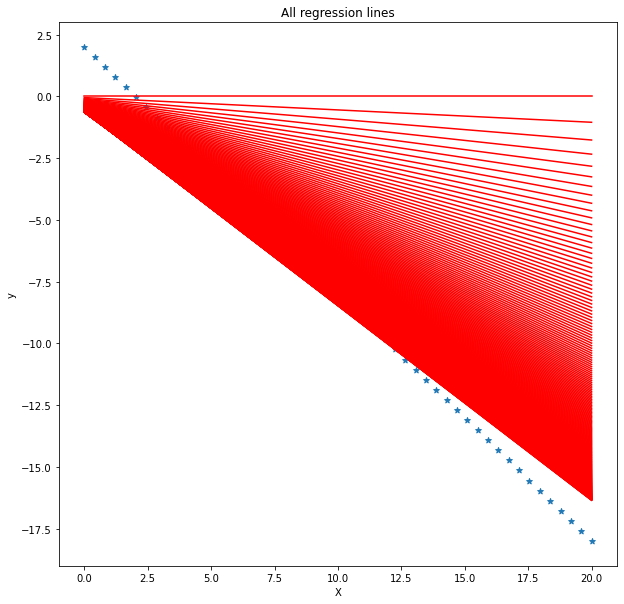

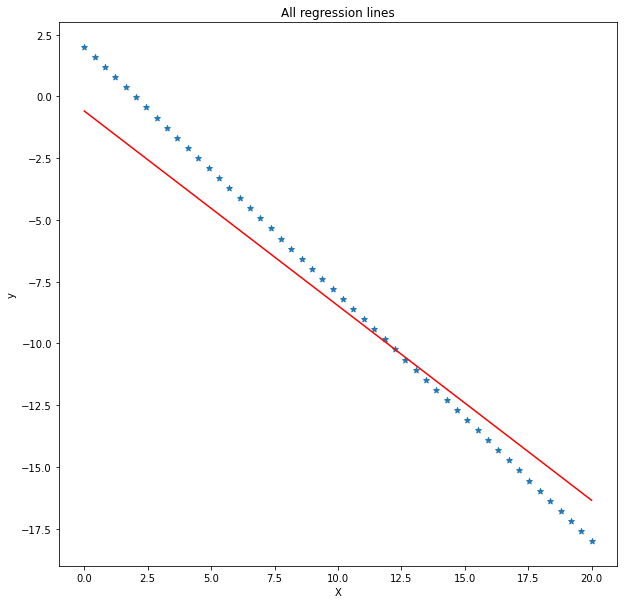

In [10]:
plot_all(cost_vals, thetas0, thetas1, 0.05, h_s, X, y, (10,10))

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [11]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = adagrad(X, y, alpha=0.005, epsilon=1e-08, iterations=5000)

Streaming output truncated to the last 5000 lines.
  -1.6667329   -1.89319842  -2.11966395  -2.34612947  -2.57259499
  -2.79906052  -3.02552604  -3.25199156  -3.47845709  -3.70492261
  -3.93138814  -4.15785366  -4.38431918  -4.61078471  -4.83725023
  -5.06371576  -5.29018128  -5.5166468   -5.74311233  -5.96957785
  -6.19604338  -6.4225089   -6.64897442  -6.87543995  -7.10190547
  -7.328371    -7.55483652  -7.78130204  -8.00776757  -8.23423309
  -8.46069861  -8.68716414  -8.91362966  -9.14009519  -9.36656071
  -9.59302623  -9.81949176 -10.04595728 -10.27242281 -10.49888833
 -10.72535385 -10.95181938 -11.1782849  -11.40475043 -11.63121595]
Error Vector: 
[-2.53440528 -2.35270754 -2.1710098  -1.98931205 -1.80761431 -1.62591657
 -1.44421883 -1.26252109 -1.08082335 -0.89912561 -0.71742786 -0.53573012
 -0.35403238 -0.17233464  0.0093631   0.19106084  0.37275858  0.55445633
  0.73615407  0.91785181  1.09954955  1.28124729  1.46294503  1.64464277
  1.82634052  2.00803826  2.189736    2.3714337

In [12]:
r2_score(y,h_s[-1])

0.7095974929894115

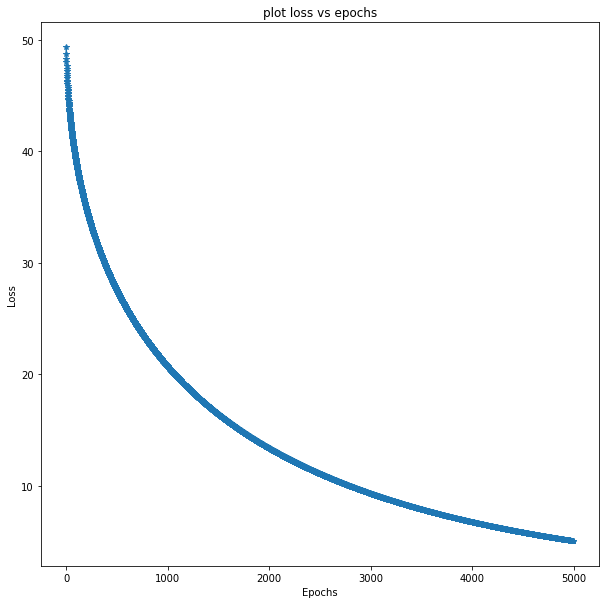

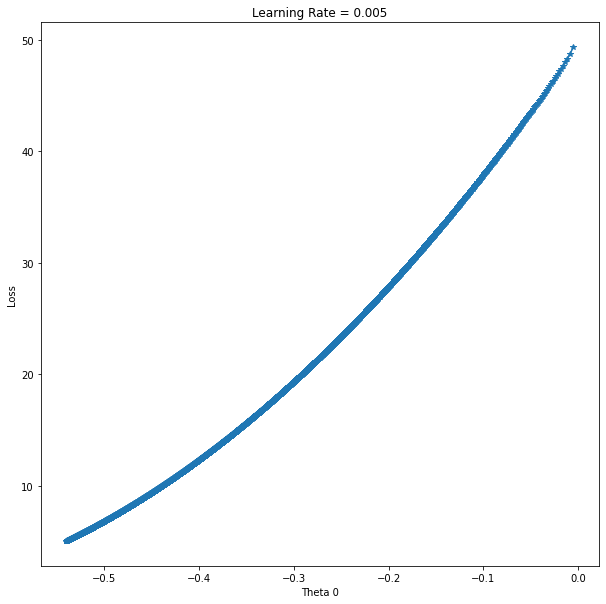

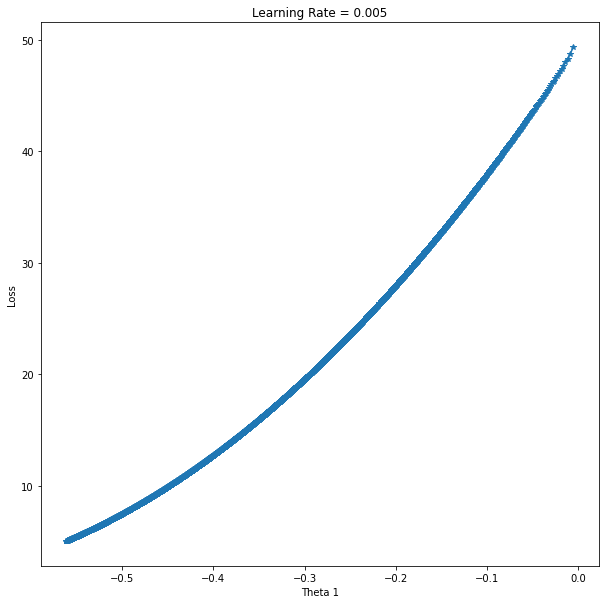

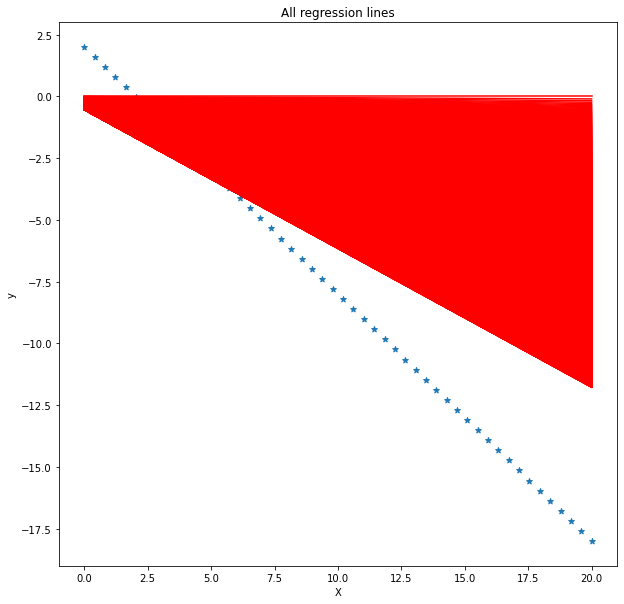

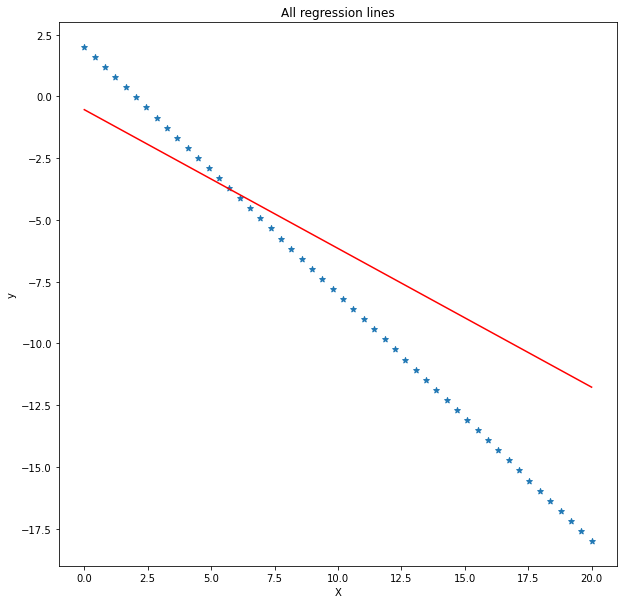

In [13]:
plot_all(cost_vals, thetas0, thetas1, 0.005, h_s, X, y, (10,10))

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

In [14]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = adagrad(X, y, alpha=0.0005, epsilon=1e-08, iterations=5000)

Streaming output truncated to the last 5000 lines.
  0.26707787  0.65370738  1.04033688  1.42696639  1.81359589  2.2002254
  2.58685491  2.97348441  3.36011392  3.74674343  4.13337293  4.52000244
  4.90663195  5.29326145  5.67989096  6.06652046  6.45314997  6.83977948
  7.22640898  7.61303849  7.999668    8.3862975   8.77292701  9.15955652
  9.54618602  9.93281553 10.31944503 10.70607454 11.09270405 11.47933355
 11.86596306 12.25259257 12.63922207 13.02585158 13.41248109 13.79911059
 14.1857401  14.5723696  14.95899911 15.34562862 15.73225812 16.11888763
 16.50551714 16.89214664]

j = 43.09100248175241
Gradient Vector: 
[[  7.41972374]
 [107.06074541]]
Gradient Vector Norm: 107.31754520012274
theta_0_new : -0.052708169861349956
theta_1_new : -0.05276673080582861
****************** Iteration 2929 ****************** 
h(x): [-0.05270817 -0.07424561 -0.09578305 -0.11732049 -0.13885793 -0.16039538
 -0.18193282 -0.20347026 -0.2250077  -0.24654514 -0.26808258 -0.28962002
 -0.31115746 -0.33269

In [15]:
r2_score(y,h_s[-1])

-1.4736441832884104

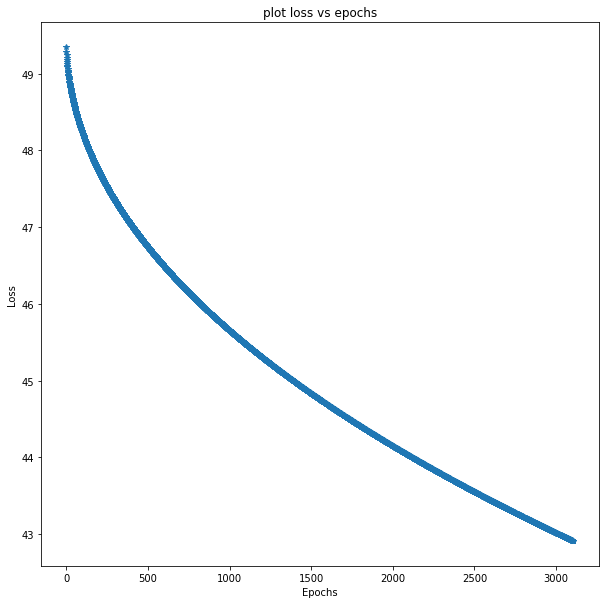

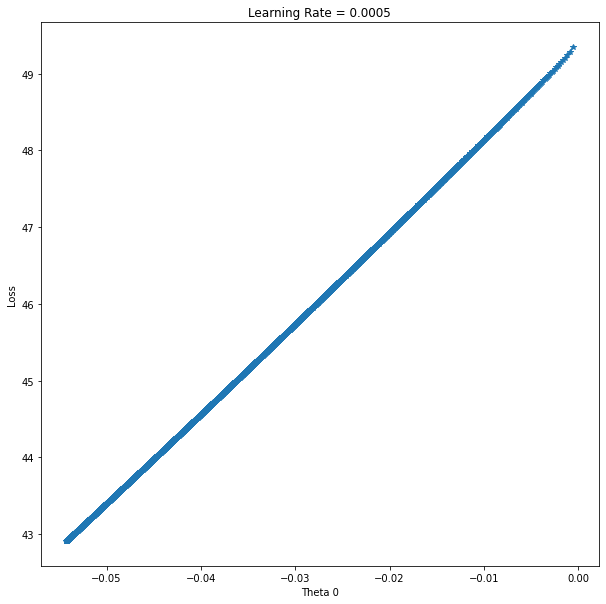

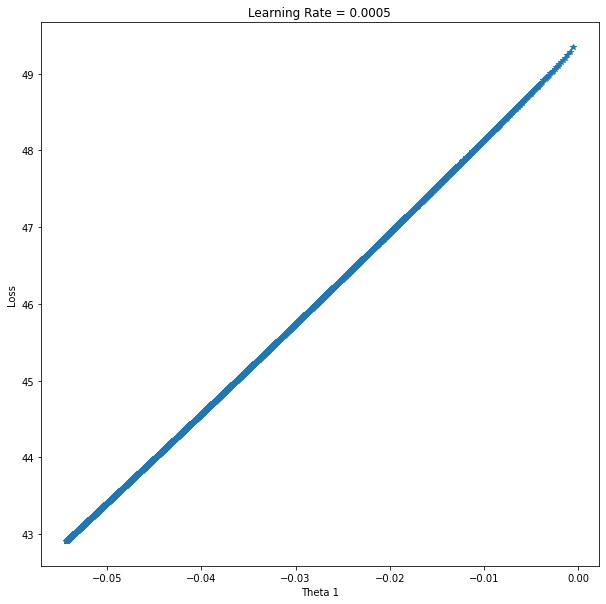

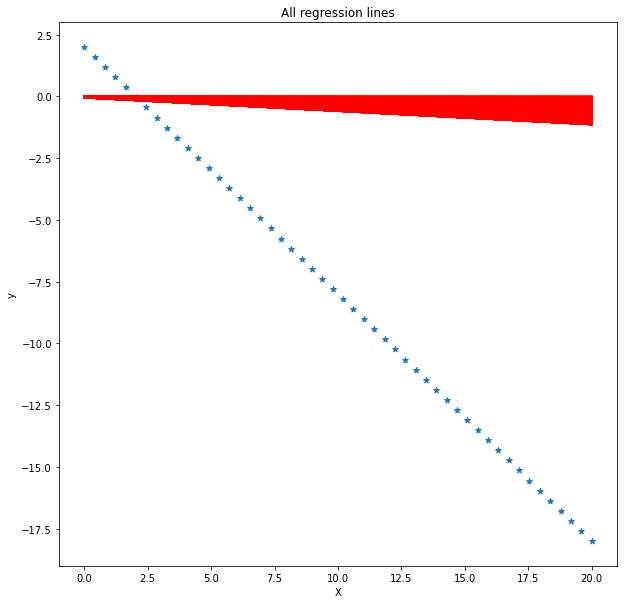

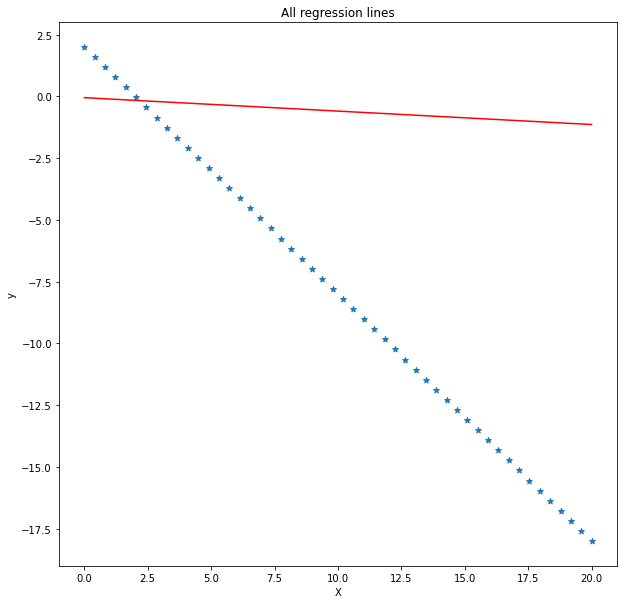

In [17]:
plot_all(cost_vals, thetas0, thetas1, 0.0005, h_s, X, y, (10,10))

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [18]:
def rmsprop(X, y, alpha, epsilon, beta, iterations):
  cost_vals = []
  h_s = []
  thetas0 = []
  thetas1 = []

  # 1. Initialize the parameters with zeros
  theta_0 = 0
  theta_1 = 0
  vt_0 = 0
  vt_1 = 0
  i = 0
  grad = np.ones((2, 1))
  m = y.shape[0]

  while i < iterations and np.linalg.norm(grad, 2) > 0.001:
      print(f"****************** Iteration {i} ****************** ")
      # 2. Predict the output
      h_x= theta_0 + theta_1 * X
      h_s.append(h_x)
      print(f"h(x): {h_x}")

      # 3. Calculate the cost function
      error = h_x - y
      j = (1 / (2 * m)) * np.linalg.norm(error, 2)**2
      print(f'Error Vector: \n{error}')
      print(f'\nj = {j}')
      cost_vals.append(j)
      
      # 4. Calculate the gradient
      d_theta_0 = np.sum(error) / m
      d_theta_1 = np.sum(error * X) / m
      grad[0] = d_theta_0
      grad[1] = d_theta_1
      print(f"Gradient Vector: \n{grad}")
      print(f"Gradient Vector Norm: {np.linalg.norm(grad, 2)}")

      # 5. Update the parameters
      vt_0 = beta * vt_0 + (1-beta) * d_theta_0**2
      vt_1 = beta * vt_1 + (1-beta) * d_theta_1**2
      theta_0 -= (alpha/(np.sqrt(vt_0) + epsilon)) * d_theta_0
      theta_1 -= (alpha/(np.sqrt(vt_1) + epsilon)) * d_theta_1
      print(f'theta_0_new : {theta_0}')
      print(f'theta_1_new : {theta_1}')
      thetas0.append(theta_0)
      thetas1.append(theta_1)

      # Convergence check
      if i > 1 and abs(cost_vals[-2] - cost_vals[-1]) < 0.001:
        break

      i += 1
    
  return theta_0, theta_1, cost_vals, h_s, thetas0, thetas1

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [19]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = rmsprop(X, y, alpha=0.05, epsilon=1e-08, beta=0.9, iterations=500)

****************** Iteration 0 ****************** 
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346938775510196
Gradient Vector: 
[[  8.        ]
 [114.69387755]]
Gradient Vector Norm: 114.97254258164628
theta_0_new : -0.158113882383419
theta_1_new : -0

In [20]:
r2_score(y,h_s[-1])

0.9993602095484933

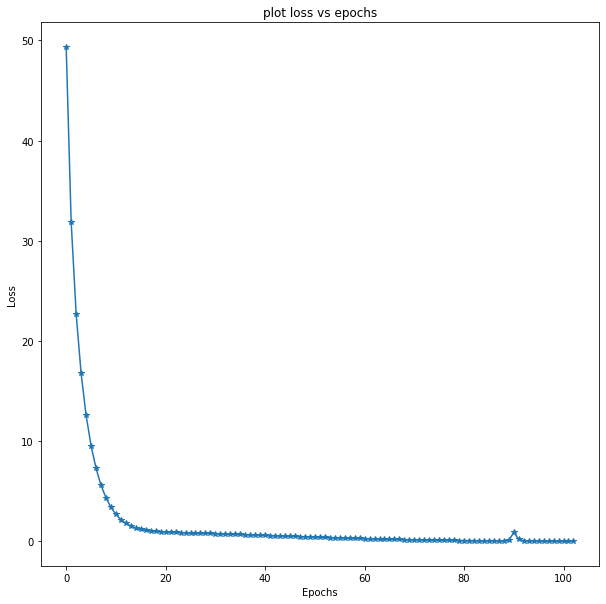

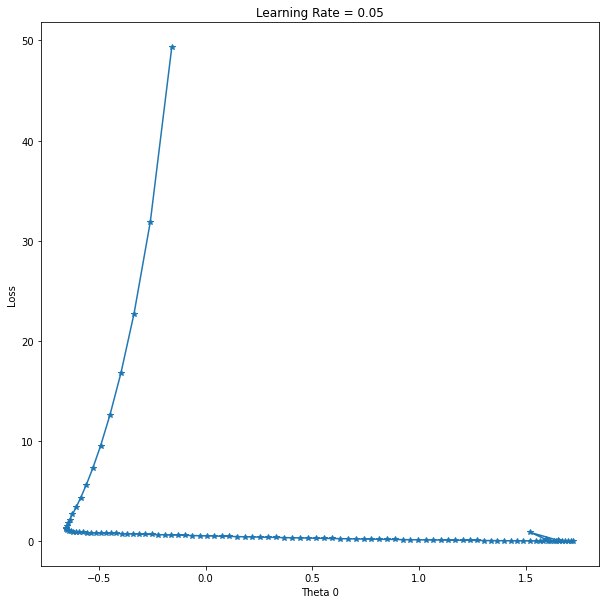

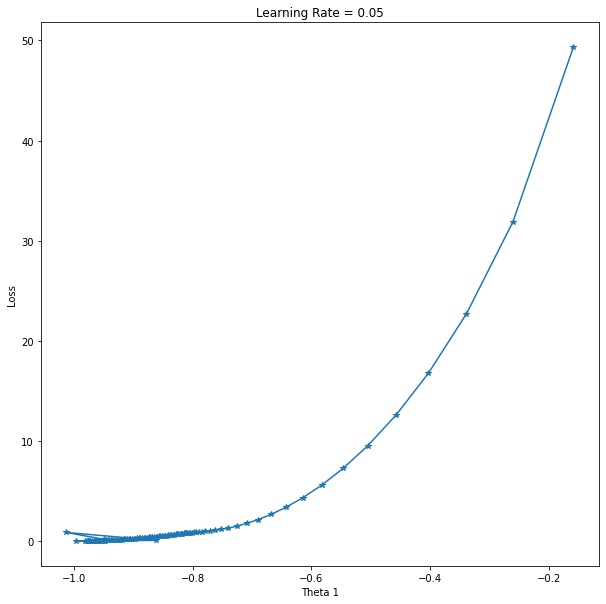

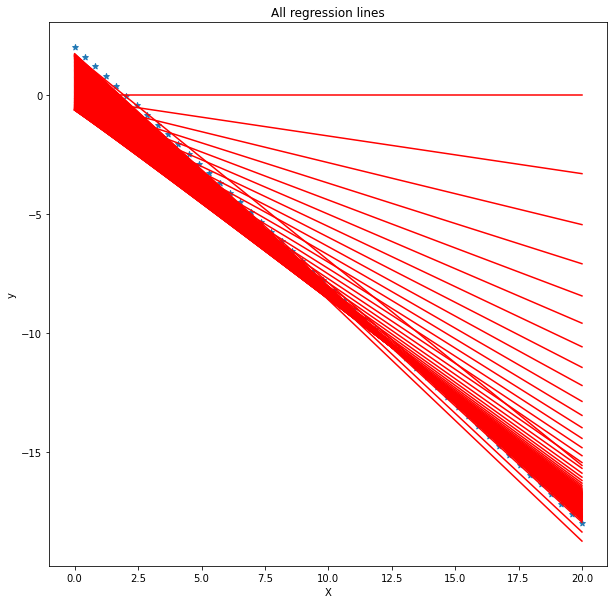

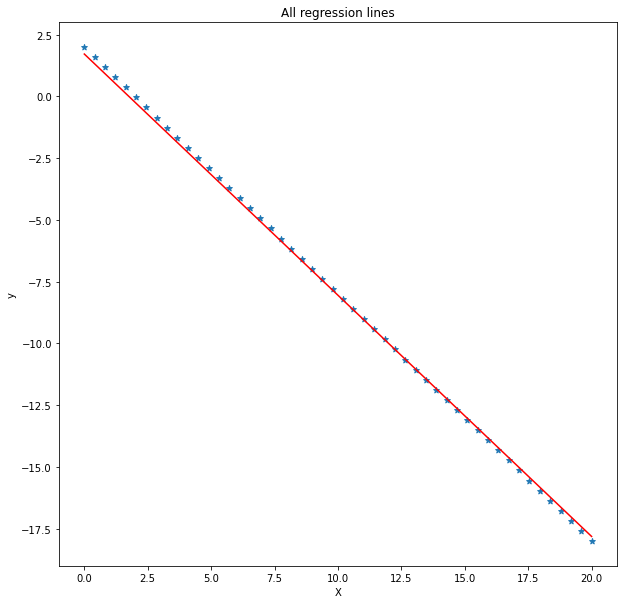

In [21]:
plot_all(cost_vals, thetas0, thetas1, 0.05, h_s, X, y, (10,10))

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [22]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = rmsprop(X, y, alpha=0.005, epsilon=1e-08, beta=0.9, iterations=5000)

Streaming output truncated to the last 5000 lines.
  0.18860022  0.23932311  0.29004599  0.34076888  0.39149176  0.44221465
  0.49293753  0.54366042  0.5943833   0.64510619  0.69582907  0.74655196
  0.79727485  0.84799773]

j = 0.3457931127002626
Gradient Vector: 
[[-0.39471296]
 [ 0.36431567]]
Gradient Vector Norm: 0.5371445140318085
theta_0_new : 0.36715786813657136
theta_1_new : -0.881082202226883
****************** Iteration 372 ****************** 
h(x): [ 3.67157868e-01  7.53247947e-03 -3.52092909e-01 -7.11718298e-01
 -1.07134369e+00 -1.43096908e+00 -1.79059446e+00 -2.15021985e+00
 -2.50984524e+00 -2.86947063e+00 -3.22909602e+00 -3.58872141e+00
 -3.94834680e+00 -4.30797218e+00 -4.66759757e+00 -5.02722296e+00
 -5.38684835e+00 -5.74647374e+00 -6.10609913e+00 -6.46572452e+00
 -6.82534991e+00 -7.18497529e+00 -7.54460068e+00 -7.90422607e+00
 -8.26385146e+00 -8.62347685e+00 -8.98310224e+00 -9.34272763e+00
 -9.70235301e+00 -1.00619784e+01 -1.04216038e+01 -1.07812292e+01
 -1.11408546e+01 

In [23]:
r2_score(y,h_s[-1])

0.9948527107478715

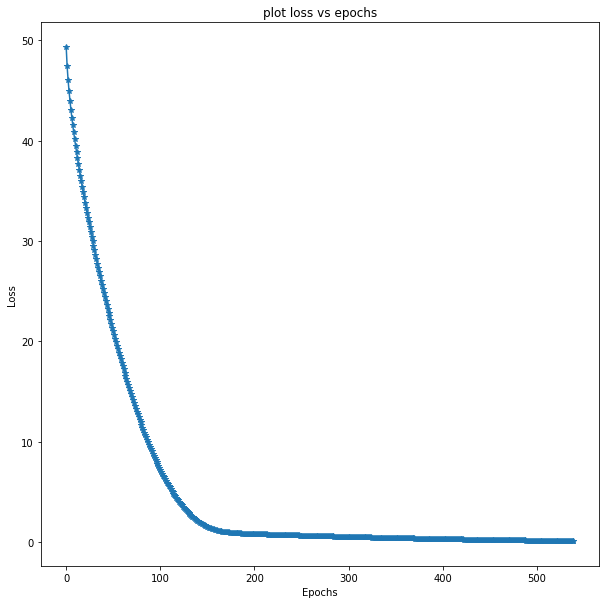

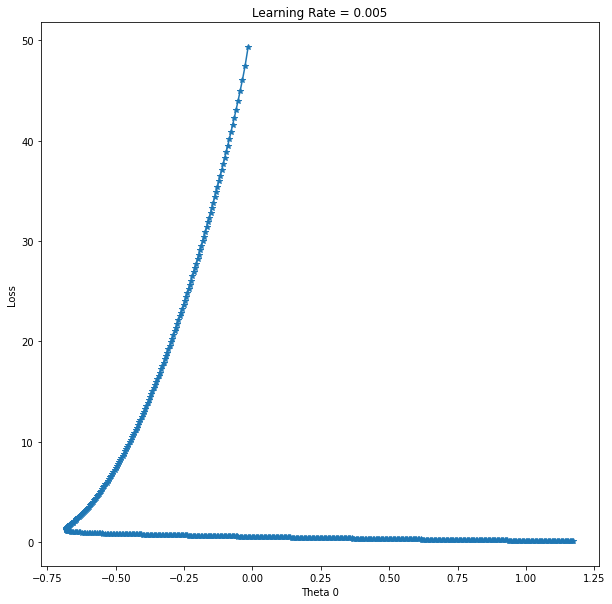

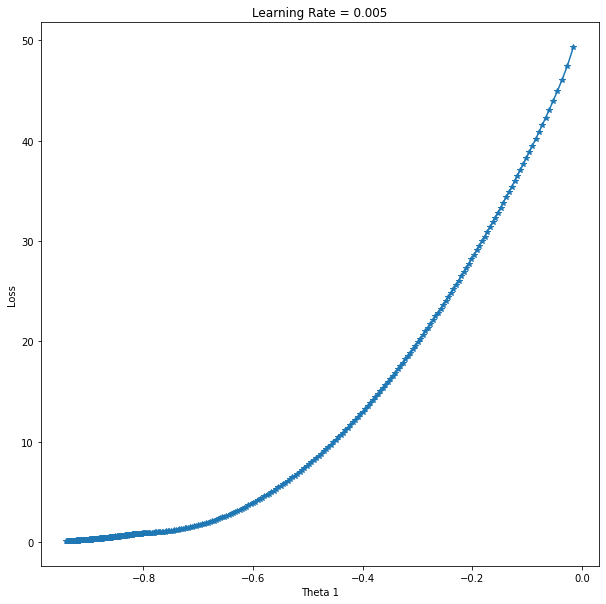

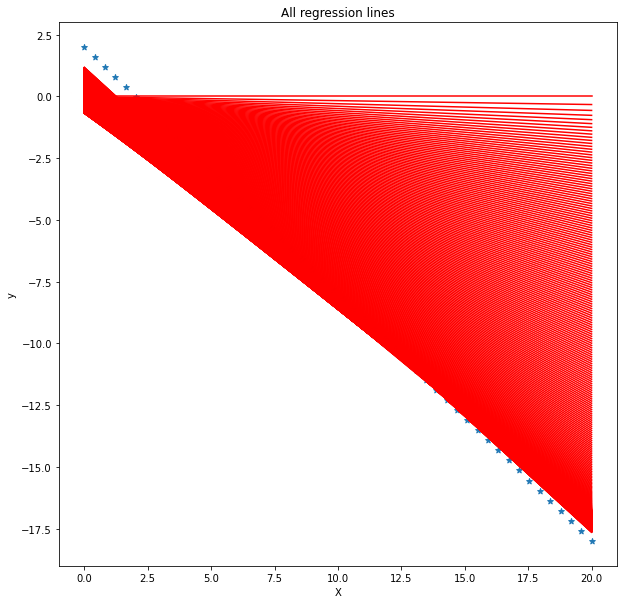

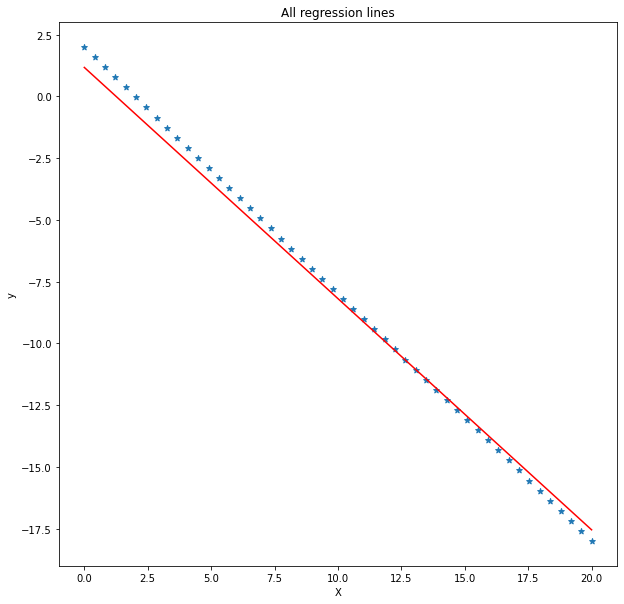

In [24]:
plot_all(cost_vals, thetas0, thetas1, 0.005, h_s, X, y, (10,10))

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [25]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = rmsprop(X, y, alpha=0.0005, epsilon=1e-08, beta=0.9, iterations=5000)

Streaming output truncated to the last 5000 lines.
  0.10092055  0.21790441  0.33488827  0.45187213  0.56885599  0.68583985
  0.80282372  0.91980758  1.03679144  1.1537753   1.27075916  1.38774302
  1.50472688  1.62171074  1.7386946   1.85567846  1.97266232  2.08964619
  2.20663005  2.32361391  2.44059777  2.55758163  2.67456549  2.79154935
  2.90853321  3.02551707]

j = 1.43768008940472
Gradient Vector: 
[[ 0.15941248]
 [11.53775298]]
Gradient Vector Norm: 11.538854196246714
theta_0_new : -0.7070688514155511
theta_1_new : -0.7138636737196216
****************** Iteration 1439 ****************** 
h(x): [ -0.70706885  -0.99844178  -1.28981471  -1.58118764  -1.87256056
  -2.16393349  -2.45530642  -2.74667935  -3.03805228  -3.3294252
  -3.62079813  -3.91217106  -4.20354399  -4.49491692  -4.78628984
  -5.07766277  -5.3690357   -5.66040863  -5.95178156  -6.24315448
  -6.53452741  -6.82590034  -7.11727327  -7.4086462   -7.70001912
  -7.99139205  -8.28276498  -8.57413791  -8.86551084  -9.15688

In [26]:
r2_score(y,h_s[-1])

0.9476184845511563

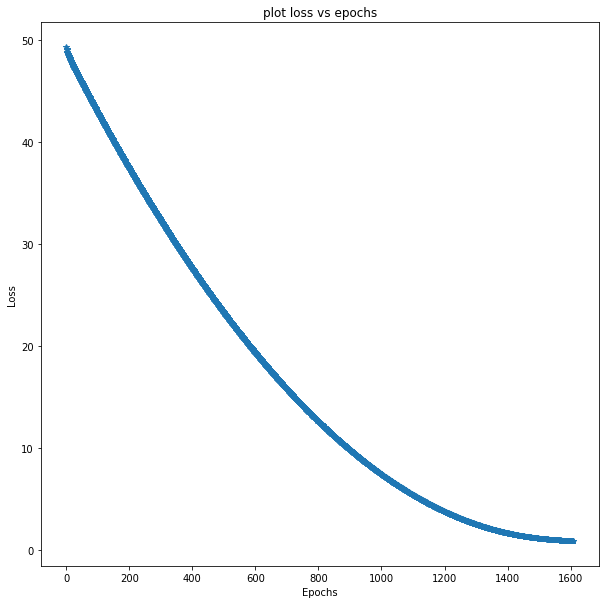

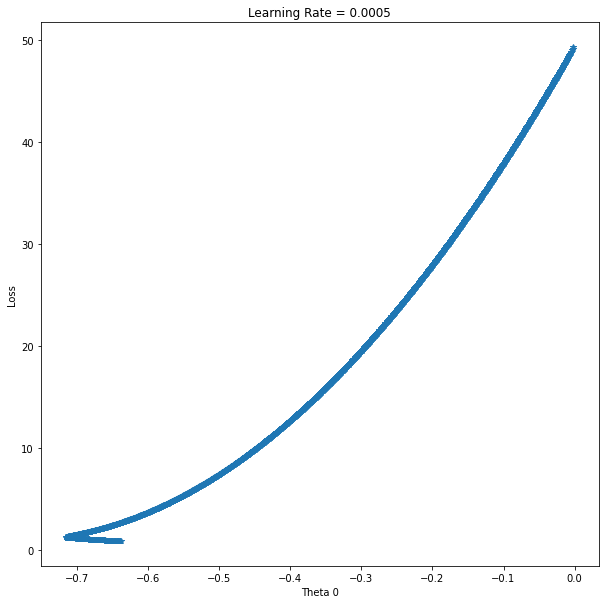

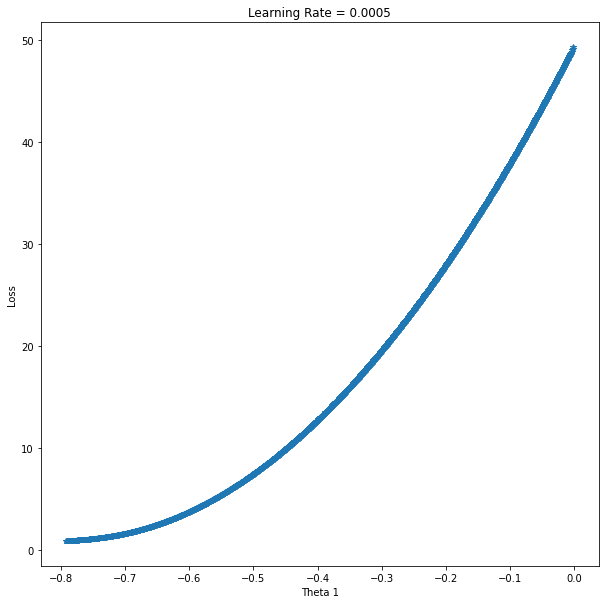

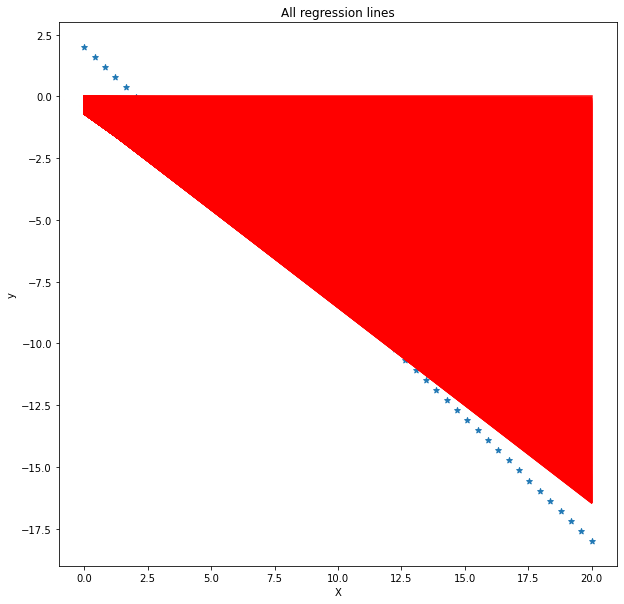

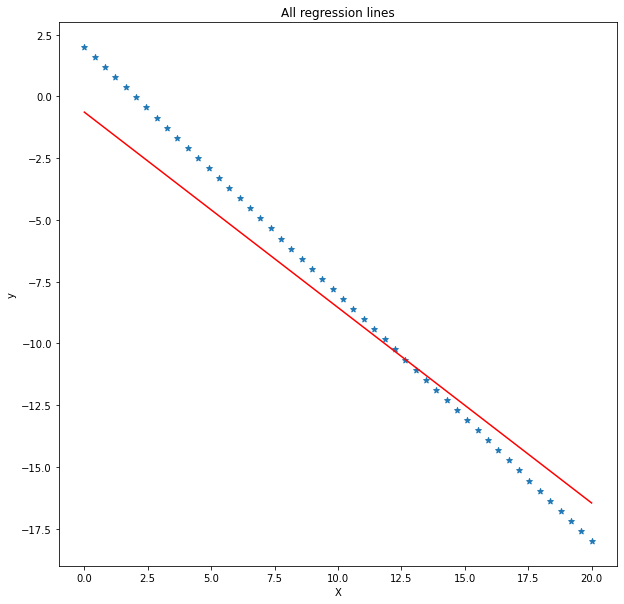

In [27]:
plot_all(cost_vals, thetas0, thetas1, 0.0005, h_s, X, y, (10,10))

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [34]:
def adam(X, y, alpha, epsilon, beta1, beta2, iterations):
  cost_vals = []
  h_s = []
  thetas0 = []
  thetas1 = []

  # 1. Initialize the parameters with zeros
  theta_0 = 0
  theta_1 = 0
  vt_0 = 0
  vt_1 = 0
  mt_0 = 0
  mt_1 = 0
  i = 0
  grad = np.ones((2, 1))
  m = y.shape[0]

  while i < iterations and np.linalg.norm(grad, 2) > 0.001:
      print(f"****************** Iteration {i} ****************** ")
      # 2. Predict the output
      h_x= theta_0 + theta_1 * X
      h_s.append(h_x)
      print(f"h(x): {h_x}")

      # 3. Calculate the cost function
      error = h_x - y
      j = (1 / (2 * m)) * np.linalg.norm(error, 2)**2
      print(f'Error Vector: \n{error}')
      print(f'\nj = {j}')
      cost_vals.append(j)
      
      # 4. Calculate the gradient
      d_theta_0 = np.sum(error) / m
      d_theta_1 = np.sum(error * X) / m
      grad[0] = d_theta_0
      grad[1] = d_theta_1
      print(f"Gradient Vector: \n{grad}")
      print(f"Gradient Vector Norm: {np.linalg.norm(grad, 2)}")

      # 5. Update the parameters
      mt_0 = beta1 * mt_0 + (1-beta1) * d_theta_0
      mt_1 = beta1 * mt_1 + (1-beta1) * d_theta_1

      mt_0_hat = mt_0/(1-beta1**(i+1))
      mt_1_hat = mt_1/(1-beta1**(i+1))

      vt_0 = beta2 * vt_0 + (1-beta2) * d_theta_0**2
      vt_1 = beta2 * vt_1 + (1-beta2) * d_theta_1**2

      vt_0_hat = vt_0/(1-beta2**(i+1))
      vt_1_hat = vt_1/(1-beta2**(i+1))

      theta_0 -= (alpha/(np.sqrt(vt_0_hat) + epsilon)) * mt_0_hat
      theta_1 -= (alpha/(np.sqrt(vt_1_hat) + epsilon)) * mt_1_hat
      print(f'theta_0_new : {theta_0}')
      print(f'theta_1_new : {theta_1}')
      thetas0.append(theta_0)
      thetas1.append(theta_1)

      # Convergence check
      if i > 1 and abs(cost_vals[-2] - cost_vals[-1]) < 0.001:
        break

      i += 1
    
  return theta_0, theta_1, cost_vals, h_s, thetas0, thetas1

##### The following results uses alpha = 0.05, beta1 = 0.05, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [35]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = adam(X, y, alpha=0.05, epsilon=1e-08, beta1=0.2, beta2=0.7, iterations=500)

****************** Iteration 0 ****************** 
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346938775510196
Gradient Vector: 
[[  8.        ]
 [114.69387755]]
Gradient Vector Norm: 114.97254258164628
theta_0_new : -0.0499999999375
theta_1_new : -0.0

In [36]:
r2_score(y,h_s[-1])

0.9989675218213927

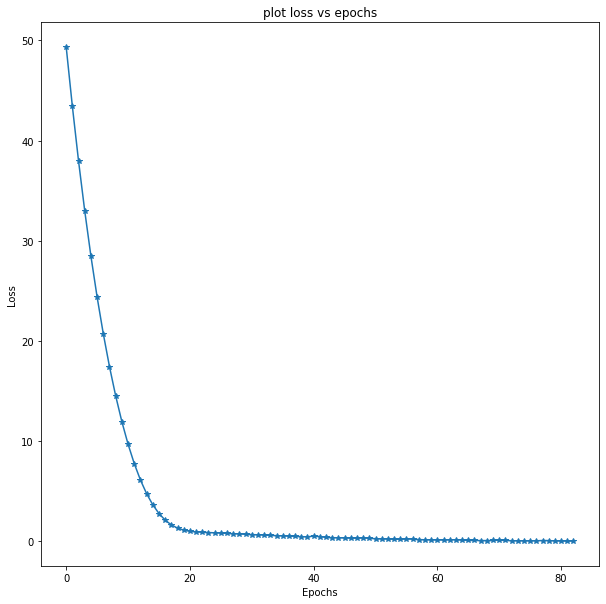

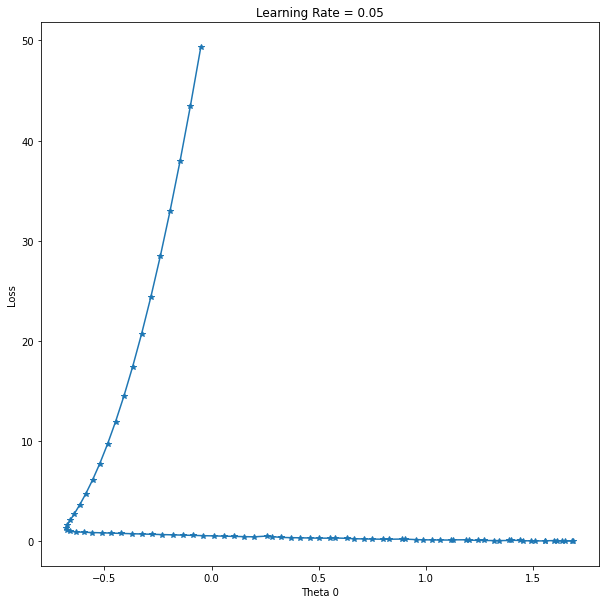

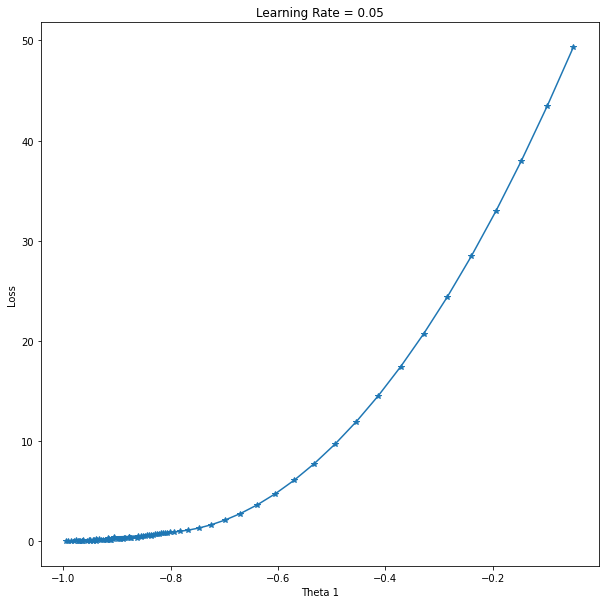

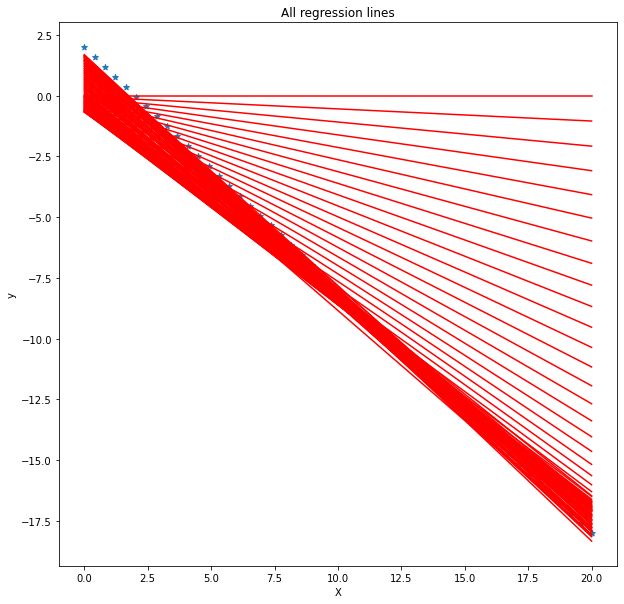

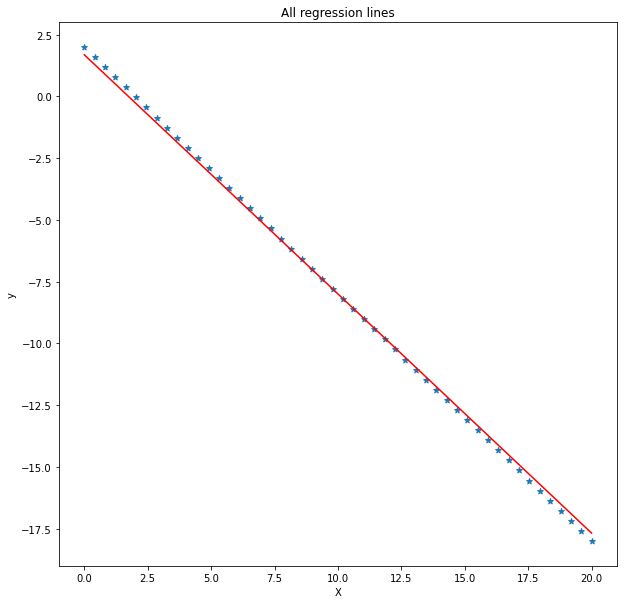

In [37]:
plot_all(cost_vals, thetas0, thetas1, 0.05, h_s, X, y, (10,10))

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [38]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = adam(X, y, alpha=0.005, epsilon=1e-08, beta1=0.5, beta2=0.8, iterations=500)

Streaming output truncated to the last 5000 lines.
  -8.66307039  -9.0163175   -9.36956462  -9.72281173 -10.07605885
 -10.42930596 -10.78255308 -11.1358002  -11.48904731 -11.84229443
 -12.19554154 -12.54878866 -12.90203577 -13.25528289 -13.60853
 -13.96177712 -14.31502423 -14.66827135 -15.02151847 -15.37476558
 -15.7280127  -16.08125981 -16.43450693 -16.78775404 -17.14100116]
Error Vector: 
[-1.8318925  -1.77697635 -1.7220602  -1.66714405 -1.6122279  -1.55731175
 -1.5023956  -1.44747945 -1.3925633  -1.33764715 -1.282731   -1.22781485
 -1.1728987  -1.11798255 -1.0630664  -1.00815025 -0.9532341  -0.89831795
 -0.8434018  -0.78848565 -0.7335695  -0.67865335 -0.6237372  -0.56882105
 -0.5139049  -0.45898875 -0.4040726  -0.34915645 -0.2942403  -0.23932415
 -0.18440801 -0.12949186 -0.07457571 -0.01965956  0.03525659  0.09017274
  0.14508889  0.20000504  0.25492119  0.30983734  0.36475349  0.41966964
  0.47458579  0.52950194  0.58441809  0.63933424  0.69425039  0.74916654
  0.80408269  0.858998

In [39]:
r2_score(y,h_s[-1])

0.992630779461015

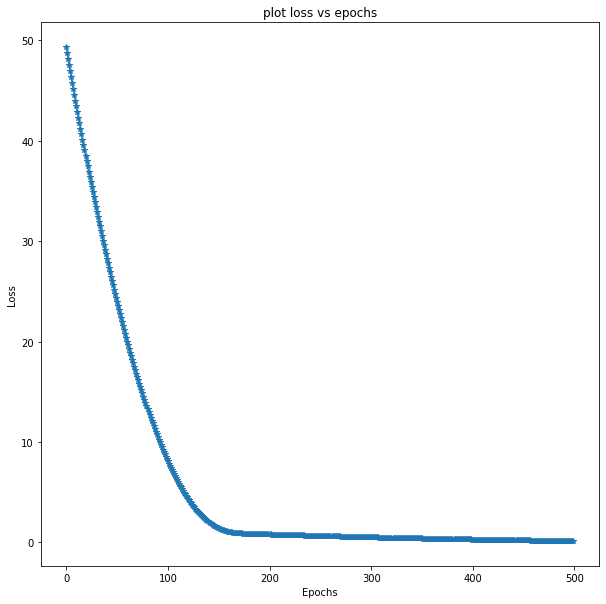

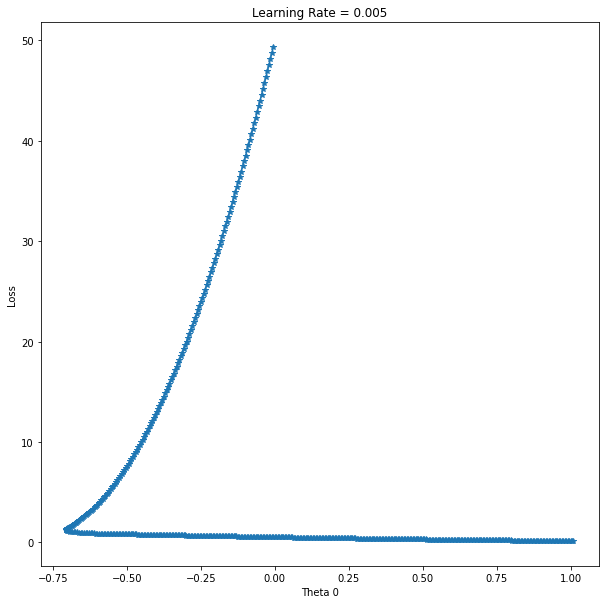

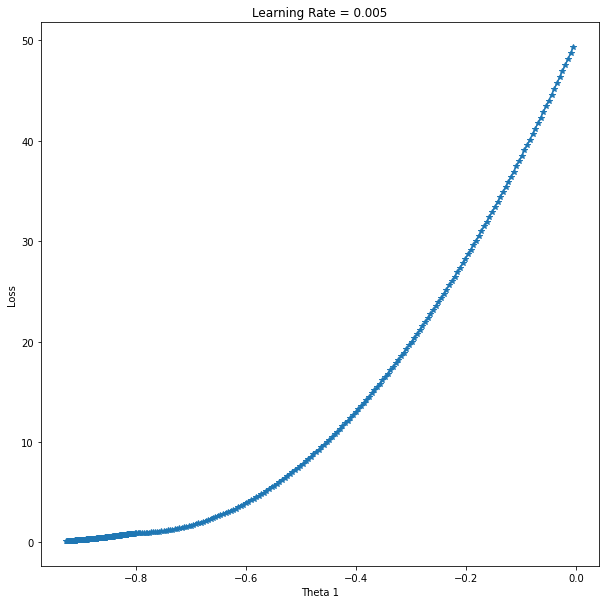

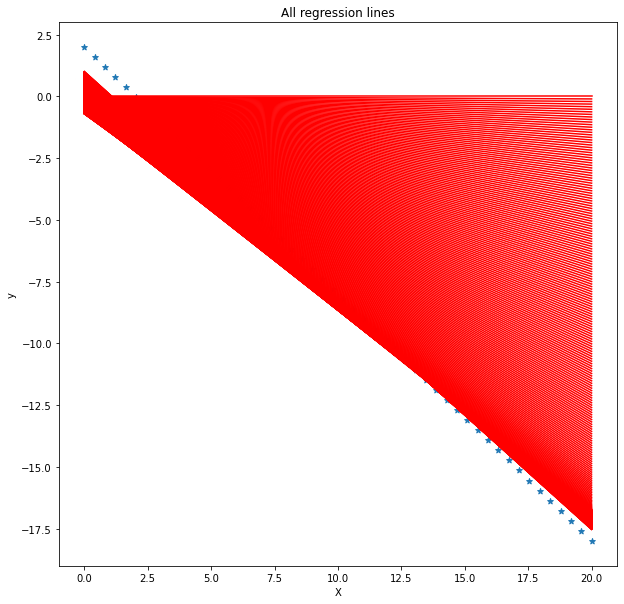

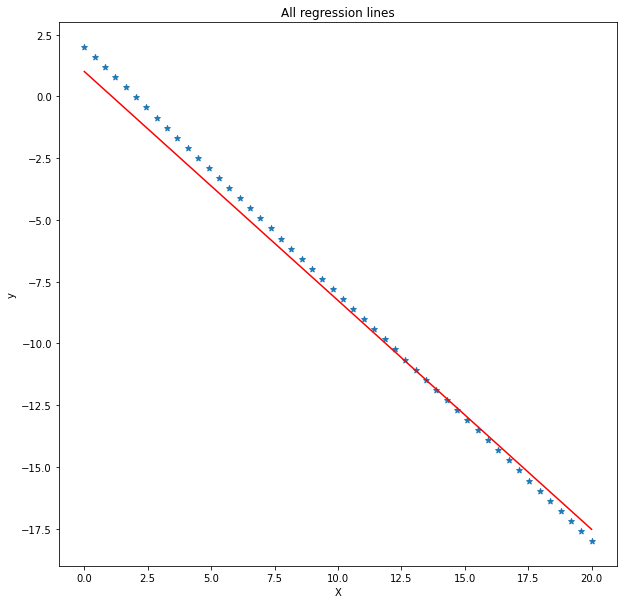

In [40]:
plot_all(cost_vals, thetas0, thetas1, 0.005, h_s, X, y, (10,10))

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [41]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = adam(X, y, alpha=0.0005, epsilon=1e-08, beta1=0.8, beta2=0.8, iterations=5000)

Streaming output truncated to the last 5000 lines.
  -3.59250416  -3.88106528  -4.16962641  -4.45818753  -4.74674866
  -5.03530978  -5.32387091  -5.61243203  -5.90099316  -6.18955428
  -6.4781154   -6.76667653  -7.05523765  -7.34379878  -7.6323599
  -7.92092103  -8.20948215  -8.49804328  -8.7866044   -9.07516552
  -9.36372665  -9.65228777  -9.9408489  -10.22941002 -10.51797115
 -10.80653227 -11.0950934  -11.38365452 -11.67221564 -11.96077677
 -12.24933789 -12.53789902 -12.82646014 -13.11502127 -13.40358239
 -13.69214352 -13.98070464 -14.26926576 -14.55782689 -14.84638801]
Error Vector: 
[-2.70689292 -2.58729077 -2.46768863 -2.34808649 -2.22848435 -2.10888221
 -1.98928007 -1.86967793 -1.75007579 -1.63047365 -1.51087151 -1.39126937
 -1.27166723 -1.15206508 -1.03246294 -0.9128608  -0.79325866 -0.67365652
 -0.55405438 -0.43445224 -0.3148501  -0.19524796 -0.07564582  0.04395632
  0.16355847  0.28316061  0.40276275  0.52236489  0.64196703  0.76156917
  0.88117131  1.00077345  1.12037559  1.2

In [42]:
r2_score(y,h_s[-1])

0.9467806664066584

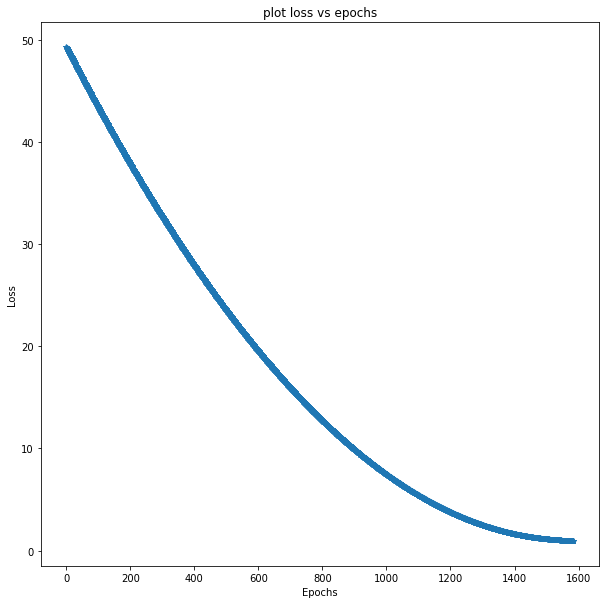

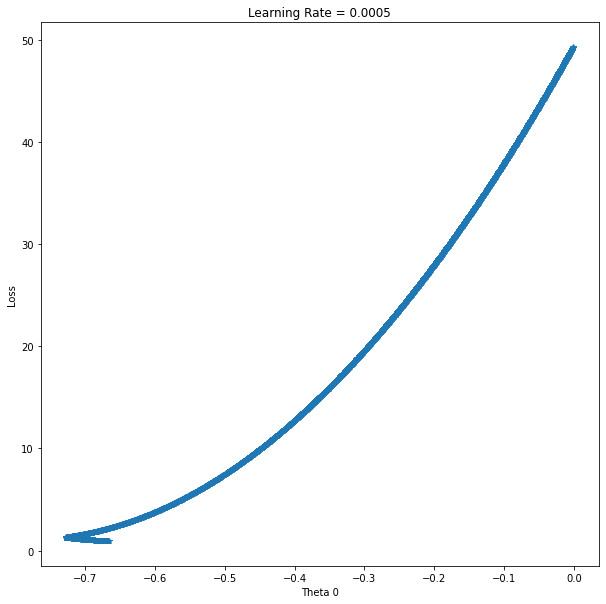

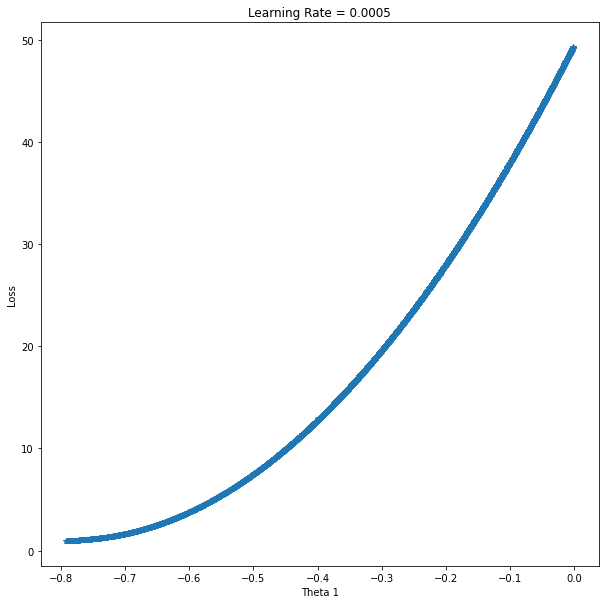

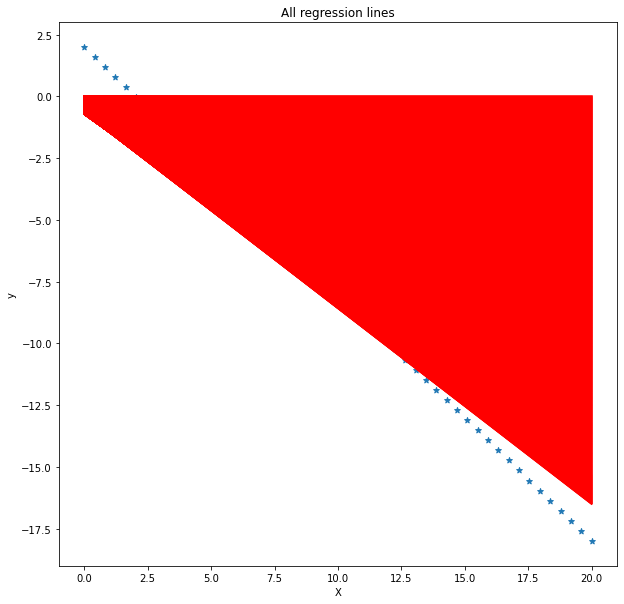

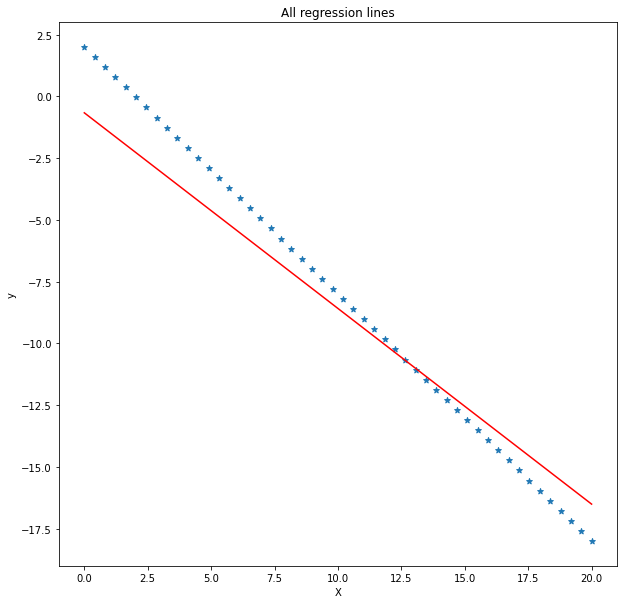

In [44]:
plot_all(cost_vals, thetas0, thetas1, 0.0005, h_s, X, y, (10,10))

### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [45]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = adam(X, y, alpha=0.001, epsilon=1e-08, beta1=0.9, beta2=0.99, iterations=5000)

Streaming output truncated to the last 5000 lines.
  -9.54271729  -9.83858644 -10.1344556  -10.43032475 -10.7261939
 -11.02206306 -11.31793221 -11.61380136 -11.90967052 -12.20553967
 -12.50140883 -12.79727798 -13.09314713 -13.38901629 -13.68488544
 -13.98075459 -14.27662375 -14.5724929  -14.86836205 -15.16423121]
Error Vector: 
[-2.66664268 -2.55434857 -2.44205446 -2.32976035 -2.21746623 -2.10517212
 -1.99287801 -1.8805839  -1.76828979 -1.65599568 -1.54370156 -1.43140745
 -1.31911334 -1.20681923 -1.09452512 -0.982231   -0.86993689 -0.75764278
 -0.64534867 -0.53305456 -0.42076045 -0.30846633 -0.19617222 -0.08387811
  0.028416    0.14071011  0.25300422  0.36529834  0.47759245  0.58988656
  0.70218067  0.81447478  0.92676889  1.03906301  1.15135712  1.26365123
  1.37594534  1.48823945  1.60053356  1.71282768  1.82512179  1.9374159
  2.04971001  2.16200412  2.27429823  2.38659235  2.49888646  2.61118057
  2.72347468  2.83576879]

j = 1.3165883228839694
Gradient Vector: 
[[ 0.08456306]
 [10

In [46]:
r2_score(y,h_s[-1])

0.9485667803280174

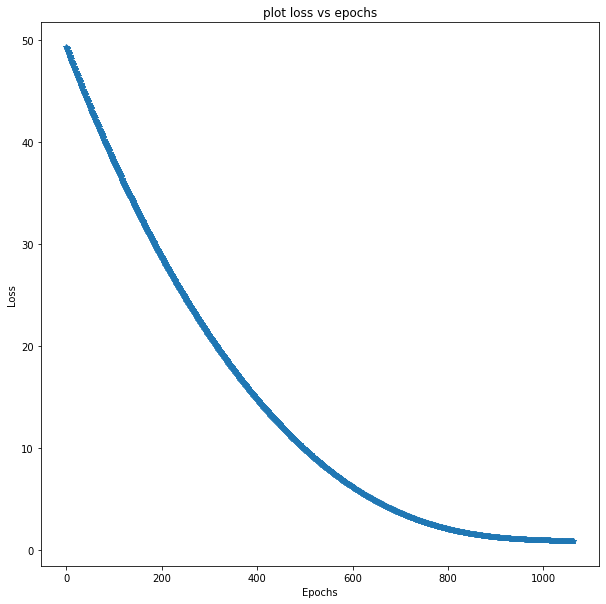

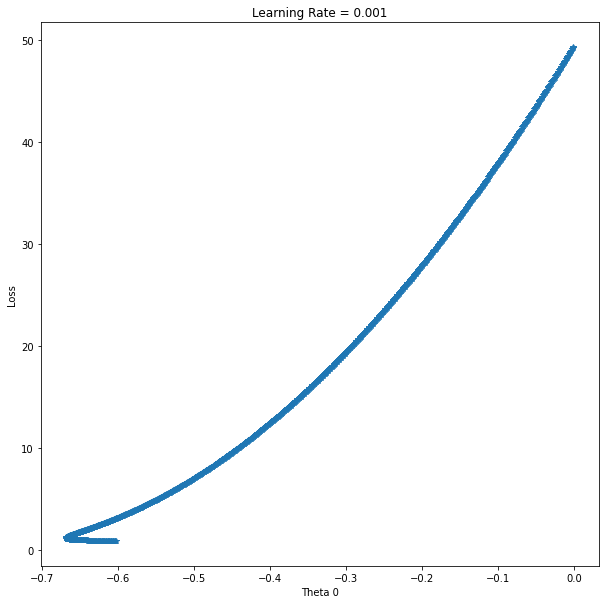

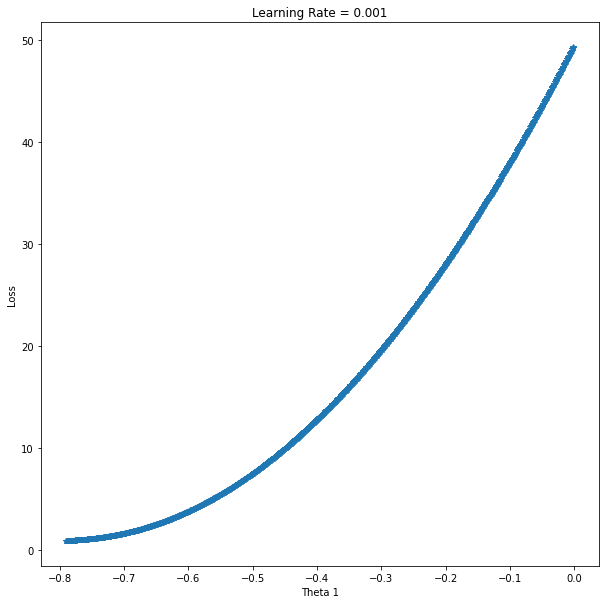

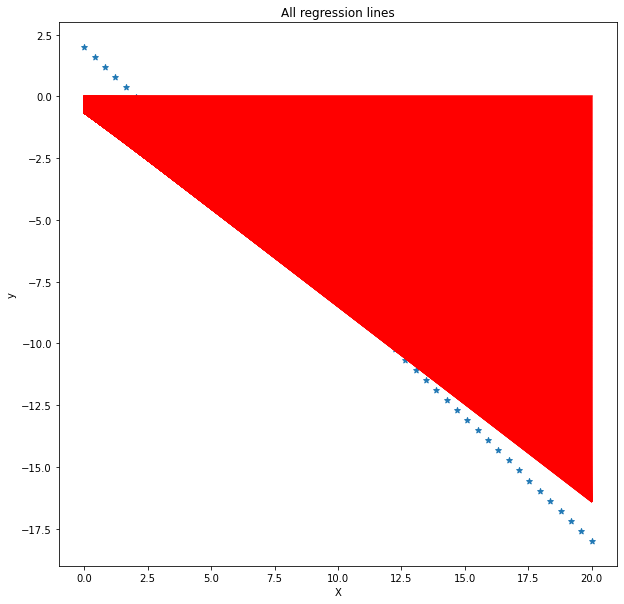

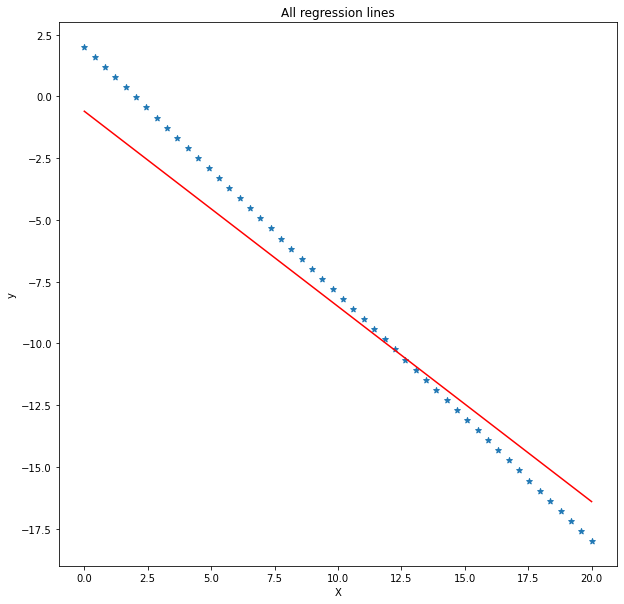

In [47]:
plot_all(cost_vals, thetas0, thetas1, 0.001, h_s, X, y, (10,10))

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [48]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = adam(X, y, alpha=0.001, epsilon=1e-08, beta1=0.9, beta2=0.5, iterations=5000)

Streaming output truncated to the last 5000 lines.
  -1.82732611  -2.07225802  -2.31718993  -2.56212184  -2.80705375
  -3.05198566  -3.29691757  -3.54184947  -3.78678138  -4.03171329
  -4.2766452   -4.52157711  -4.76650902  -5.01144092  -5.25637283
  -5.50130474  -5.74623665  -5.99116856  -6.23610047  -6.48103238
  -6.72596428  -6.97089619  -7.2158281   -7.46076001  -7.70569192
  -7.95062383  -8.19555573  -8.44048764  -8.68541955  -8.93035146
  -9.17528337  -9.42021528  -9.66514719  -9.91007909 -10.155011
 -10.39994291 -10.64487482 -10.88980673 -11.13473864 -11.37967054
 -11.62460245 -11.86953436 -12.11446627 -12.35939818 -12.60433009]
Error Vector: 
[-2.60266657 -2.43943522 -2.27620386 -2.1129725  -1.94974114 -1.78650979
 -1.62327843 -1.46004707 -1.29681572 -1.13358436 -0.970353   -0.80712165
 -0.64389029 -0.48065893 -0.31742758 -0.15419622  0.00903514  0.17226649
  0.33549785  0.49872921  0.66196056  0.82519192  0.98842328  1.15165464
  1.31488599  1.47811735  1.64134871  1.80458006 

In [49]:
r2_score(y,h_s[-1])

0.944245878919177

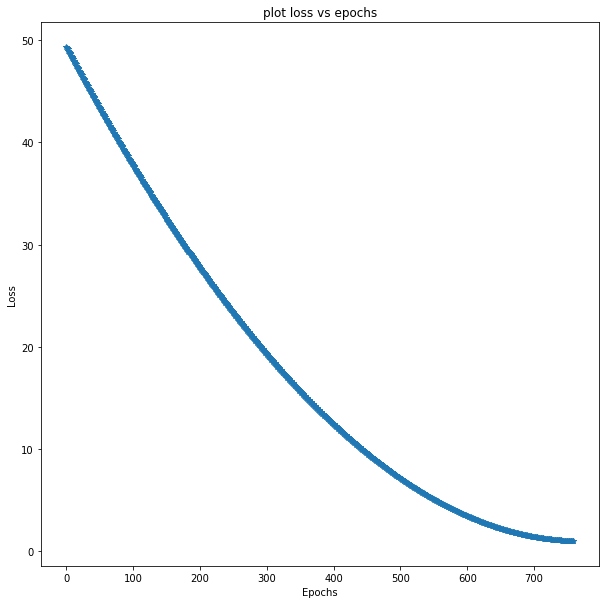

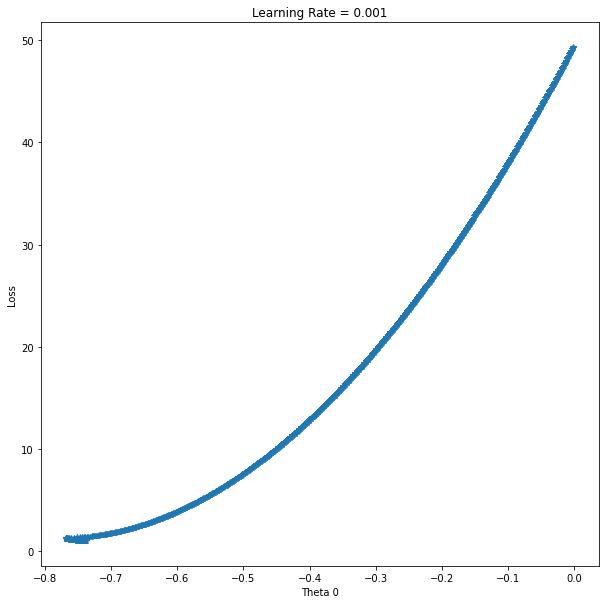

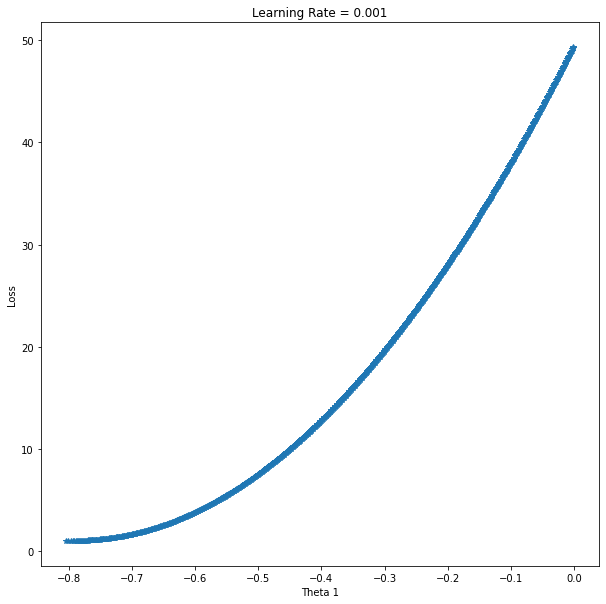

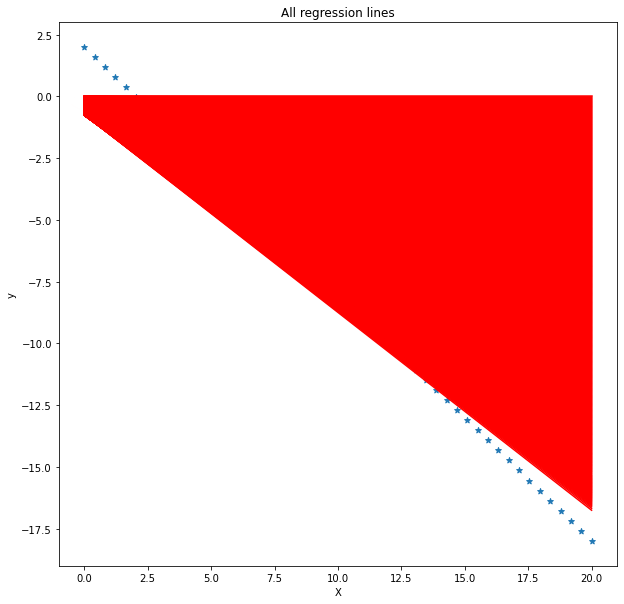

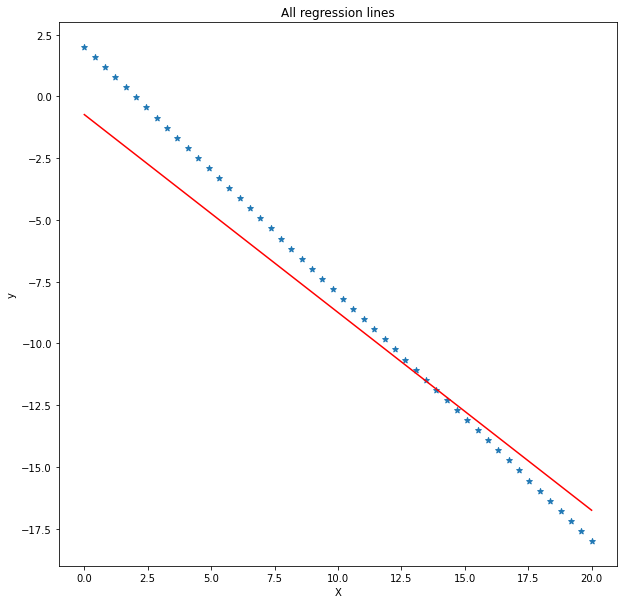

In [50]:
plot_all(cost_vals, thetas0, thetas1, 0.001, h_s, X, y, (10,10))

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [51]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = adam(X, y, alpha=0.001, epsilon=1e-08, beta1=0.5, beta2=0.99, iterations=5000)

Streaming output truncated to the last 5000 lines.
[[0.03664726]
 [9.73126139]]
Gradient Vector Norm: 9.731330392289289
theta_0_new : -0.6626582971367205
theta_1_new : -0.7305573274548312
****************** Iteration 920 ****************** 
h(x): [ -0.6626583   -0.96084496  -1.25903163  -1.55721829  -1.85540495
  -2.15359162  -2.45177828  -2.74996495  -3.04815161  -3.34633828
  -3.64452494  -3.9427116   -4.24089827  -4.53908493  -4.8372716
  -5.13545826  -5.43364493  -5.73183159  -6.03001825  -6.32820492
  -6.62639158  -6.92457825  -7.22276491  -7.52095158  -7.81913824
  -8.1173249   -8.41551157  -8.71369823  -9.0118849   -9.31007156
  -9.60825823  -9.90644489 -10.20463155 -10.50281822 -10.80100488
 -11.09919155 -11.39737821 -11.69556488 -11.99375154 -12.2919382
 -12.59012487 -12.88831153 -13.1864982  -13.48468486 -13.78287152
 -14.08105819 -14.37924485 -14.67743152 -14.97561818 -15.27380485]
Error Vector: 
[-2.6626583  -2.5526817  -2.4427051  -2.33272849 -2.22275189 -2.11277529
 -2.00

In [52]:
r2_score(y,h_s[-1])

0.949344733641701

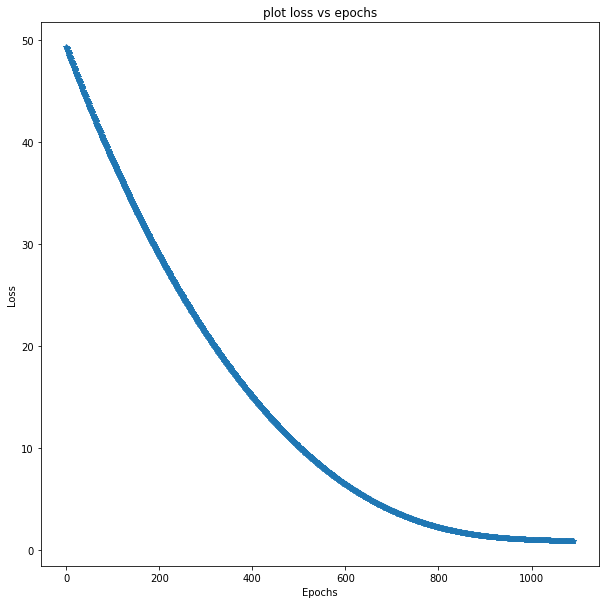

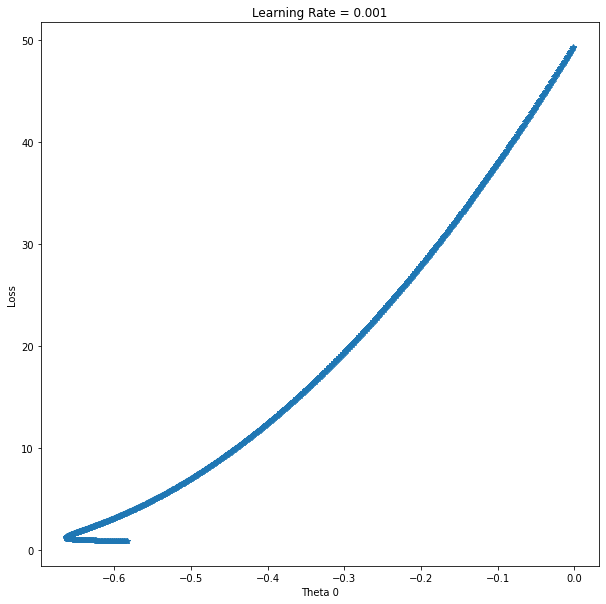

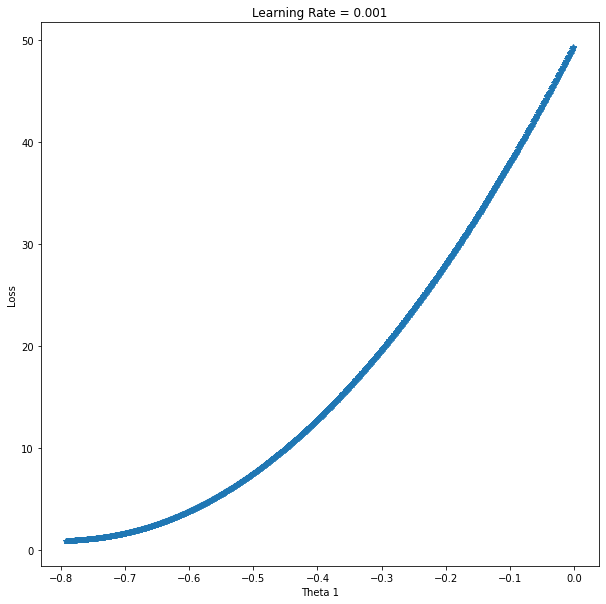

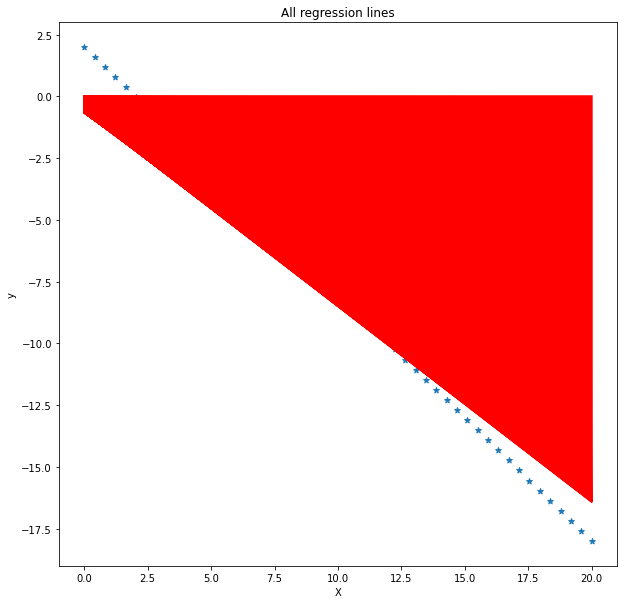

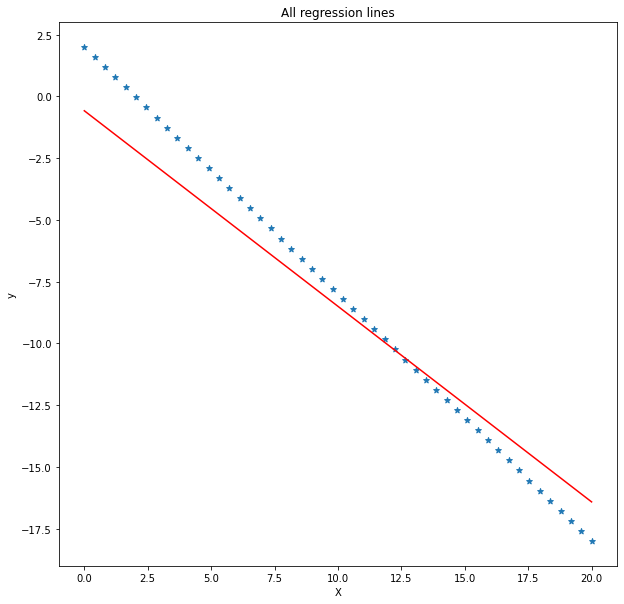

In [53]:
plot_all(cost_vals, thetas0, thetas1, 0.001, h_s, X, y, (10,10))

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [54]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = adam(X, y, alpha=0.001, epsilon=1e-08, beta1=0.5, beta2=0.5, iterations=5000)

Streaming output truncated to the last 5000 lines.
[[ 1.07005699]
 [23.53747202]]
Gradient Vector Norm: 23.561782847512436
theta_0_new : -0.6309911522627065
theta_1_new : -0.6309951377956317
****************** Iteration 631 ****************** 
h(x): [ -0.63099115  -0.88854019  -1.14608922  -1.40363826  -1.6611873
  -1.91873633  -2.17628537  -2.4338344   -2.69138344  -2.94893247
  -3.20648151  -3.46403055  -3.72157958  -3.97912862  -4.23667765
  -4.49422669  -4.75177573  -5.00932476  -5.2668738   -5.52442283
  -5.78197187  -6.0395209   -6.29706994  -6.55461898  -6.81216801
  -7.06971705  -7.32726608  -7.58481512  -7.84236416  -8.09991319
  -8.35746223  -8.61501126  -8.8725603   -9.13010933  -9.38765837
  -9.64520741  -9.90275644 -10.16030548 -10.41785451 -10.67540355
 -10.93295259 -11.19050162 -11.44805066 -11.70559969 -11.96314873
 -12.22069776 -12.4782468  -12.73579584 -12.99334487 -13.25089391]
Error Vector: 
[-2.63099115 -2.48037692 -2.32976269 -2.17914846 -2.02853423 -1.87792
 -1.7

In [55]:
r2_score(y,h_s[-1])

0.9475845101116701

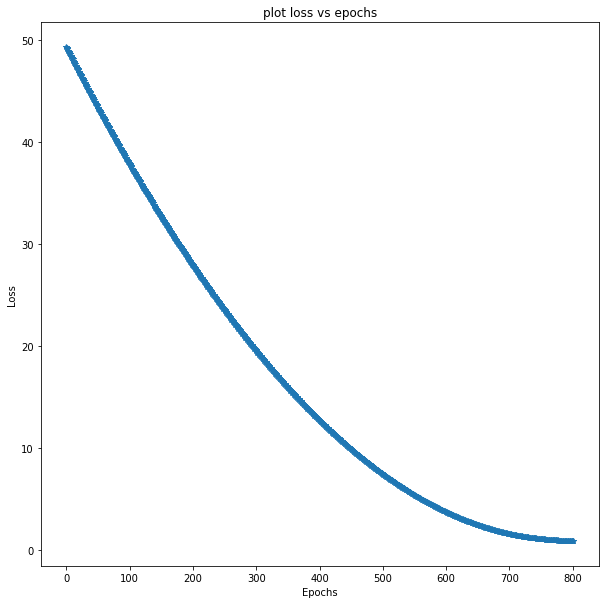

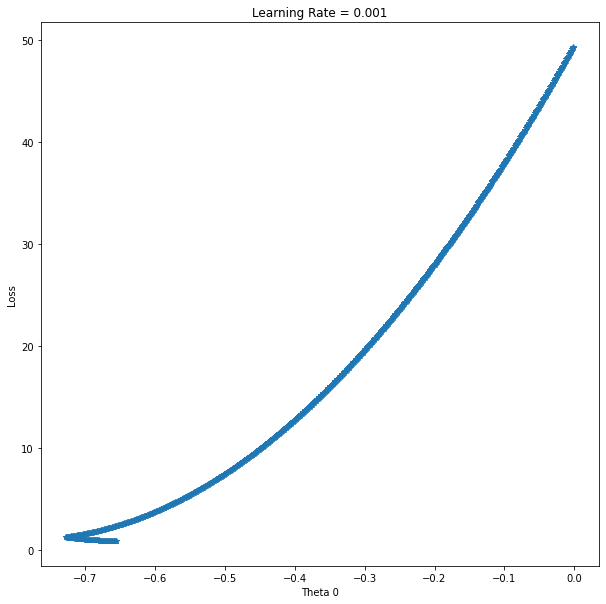

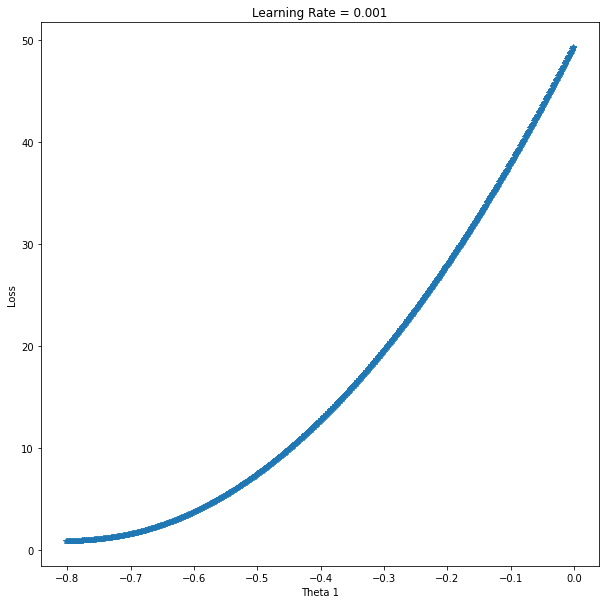

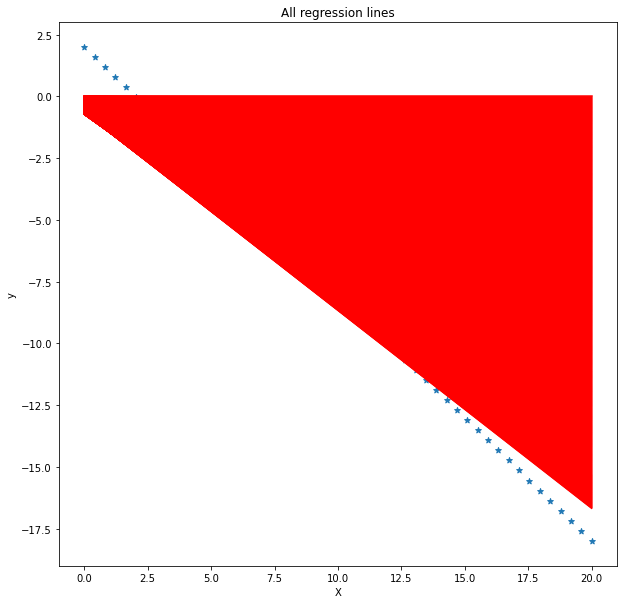

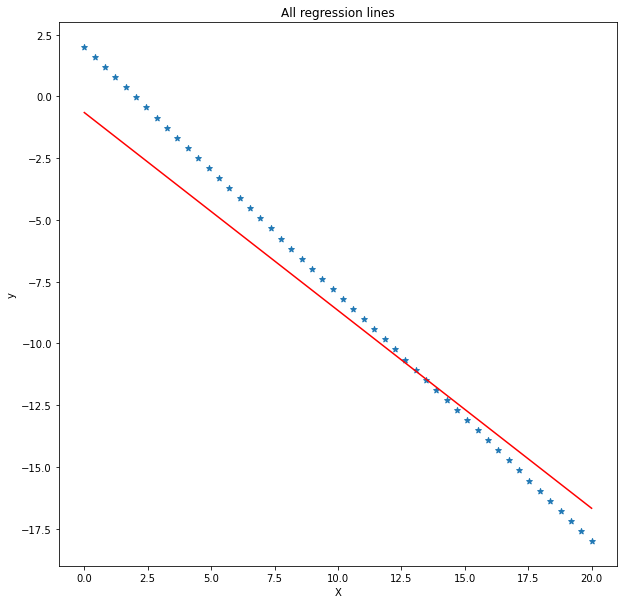

In [56]:
plot_all(cost_vals, thetas0, thetas1, 0.001, h_s, X, y, (10,10))

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [57]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = adam(X, y, alpha=0.01, epsilon=1e-08, beta1=0.9, beta2=0.99, iterations=5000)

Streaming output truncated to the last 5000 lines.
j = 0.362975851877094
Gradient Vector: 
[[-0.40387501]
 [ 0.38018495]]
Gradient Vector Norm: 0.5546671251656125
theta_0_new : 0.3275587426095399
theta_1_new : -0.8730235064204406
****************** Iteration 393 ****************** 
h(x): [  0.32755874  -0.02877738  -0.38511351  -0.74144963  -1.09778576
  -1.45412188  -1.81045801  -2.16679413  -2.52313026  -2.87946638
  -3.23580251  -3.59213863  -3.94847476  -4.30481088  -4.66114701
  -5.01748313  -5.37381926  -5.73015538  -6.08649151  -6.44282763
  -6.79916376  -7.15549988  -7.51183601  -7.86817213  -8.22450826
  -8.58084438  -8.93718051  -9.29351663  -9.64985276 -10.00618888
 -10.36252501 -10.71886113 -11.07519726 -11.43153338 -11.78786951
 -12.14420563 -12.50054176 -12.85687788 -13.21321401 -13.56955014
 -13.92588626 -14.28222239 -14.63855851 -14.99489464 -15.35123076
 -15.70756689 -16.06390301 -16.42023914 -16.77657526 -17.13291139]
Error Vector: 
[-1.67244126 -1.62061412 -1.5687869

In [58]:
r2_score(y,h_s[-1])

0.9952892444628807

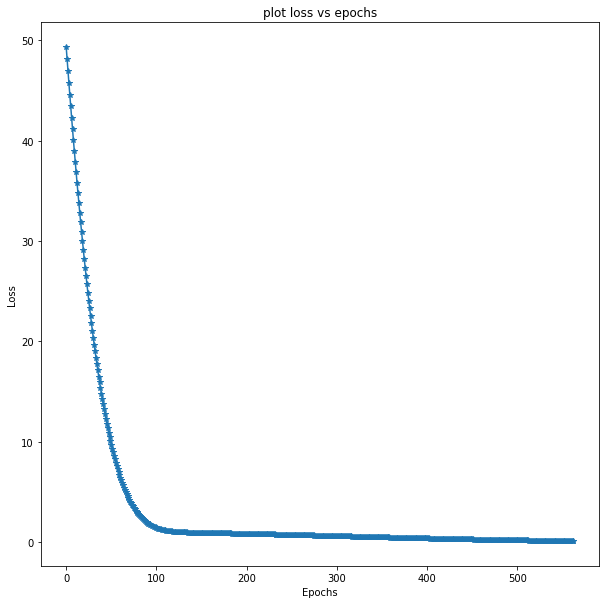

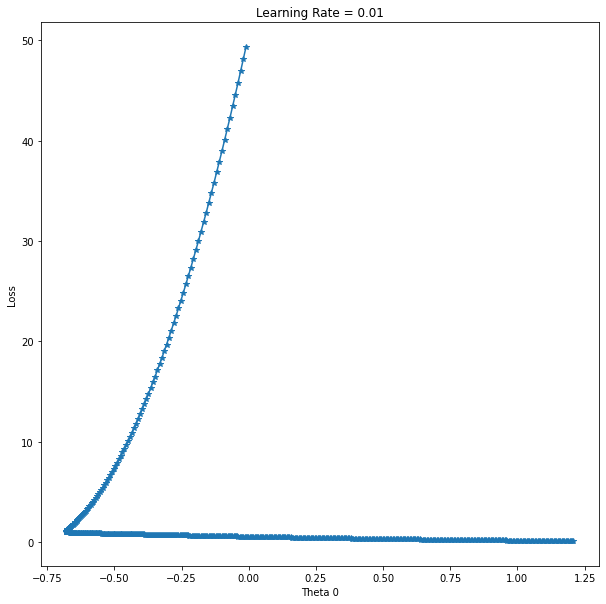

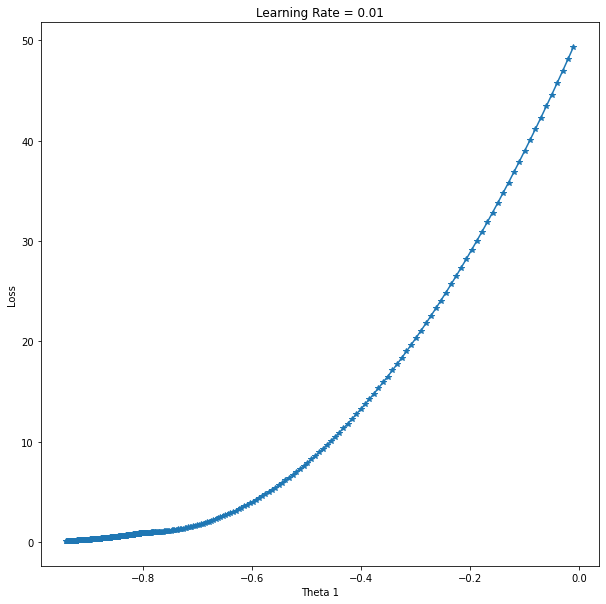

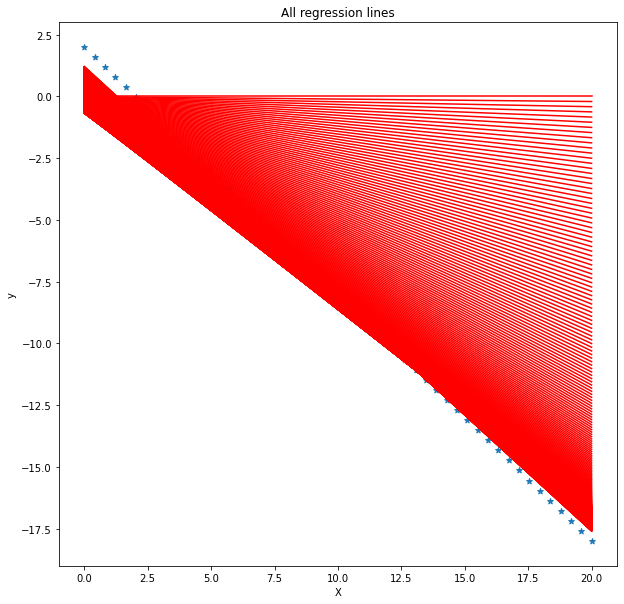

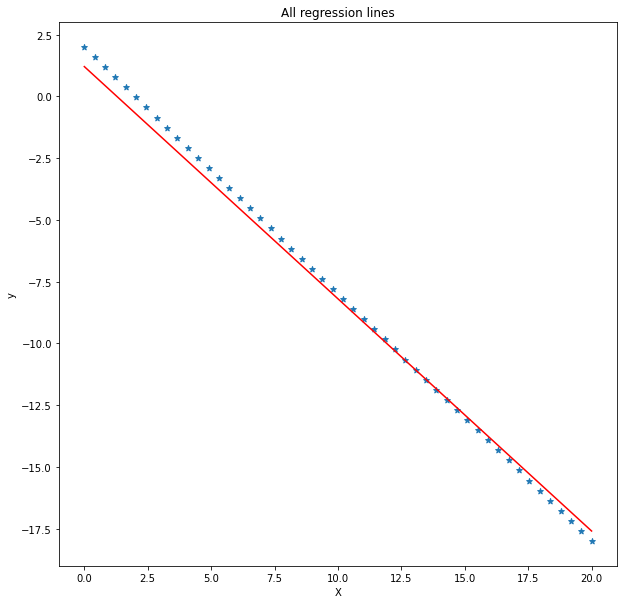

In [59]:
plot_all(cost_vals, thetas0, thetas1, 0.01, h_s, X, y, (10,10))

## Congratulations 
![image.png](attachment:image.png)